# **LDD 1C-2025**

**Librerías necesarias**

In [48]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns  # Para los boxplot
import seaborn.objects as so
import sympy as sp

from formulaic import Formula  # Para plantear el modelo lineal
from IPython.display import Markdown  # Para usar latex en strings
from pathlib import Path
from sklearn import linear_model  # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error  # Medidas de desempeño
from sklearn.preprocessing import MinMaxScaler  # Para escalamiento MinMax de las variables
from sklearn.preprocessing import StandardScaler  # Para escalamiento estándar de las variables
from sklearn.preprocessing import PolynomialFeatures  # Herramientas de polinomios

**Otras**

In [3]:
# # Chequear que activé el entorno correcto
# import sys
# print(sys.executable)  

# # Ver nombres de colores para las visualizaciones
# import matplotlib.colors as mcolors
# display(list(mcolors.CSS4_COLORS.keys()))

## **EJERCICIOS DEL PRIMER CUADERNO**

### Norma
**Ejercicio.** Definir una función que calcule la **norma** (euclideana o **L2**) de un vector. *\[La "L" hace referencia a la teoría de los espacios de Lebesgue]* 

In [4]:
def normaL2(arr):
    return np.round(np.sqrt(np.sum(arr**2)), 2)

v = np.array([1,2,3])
normaL2(v)

np.float64(3.74)

### Azar
**Ley de los grandes números.** Esta ley asegura que si tiramos $n$ veces una moneda, el promedio de veces que sale cara tiende a $1/2$ cuando $n$ tiende a infinito.

Simular 10 lanzamientos de una moneda y calcular el promedio de veces que sale cara. Repetir para $n = 1000$ y $n = 100.000$.

**Ejercicio.** Se tira $n$ veces una moneda. Intentar predecir, si existen, los siguientes límites cuando $n$ tiene a infinito y verificar la intuición mediante simulaciones.

1. La cantidad de caras dividido por la cantidad de cecas:   **\[$\to 1$ cuando $n \to \infty$\]**
2. La cantidad de caras menos la cantidad de cecas:  **\[$\to$ una cantidad cada vez más pequeña de lanzamientos, cuando $n \to \infty$\]**
3. La cantidad de caras menos la cantidad de cecas, divido por la cantidad total de tiradas: **\[$\to 0$ cuando $n \to \infty$\]**
4. Considerando las veces que salieron tres caras seguidas, el promedio de veces que en la siguiente tirada sale nuevamente cara. **\[$\to 0.5$ cuando $n \to \infty$\]**

In [5]:
resultados_posibles = np.array (['cara','ceca'])
lanzamientos = 100000
simulacion = np.random.choice(resultados_posibles, size = lanzamientos)
es_cara = np.where(simulacion == 'cara', True, False)

#1
caras = np.sum(np.where(es_cara == True, 1, 0))
cecas = es_cara.size - caras
rel_caras_cecas = np.round(caras / cecas,3)
print(f'Caras entre cecas: {rel_caras_cecas}')

#2 
print(f'Caras - cecas: {caras - cecas}')

#3
print(f'(Caras - cecas) / tiradas: {np.round((caras - cecas) / lanzamientos, 3)}')


#4
def veces_seguidas(caras):
    indices_caras = np.where(caras == True)[0]
    indices_tres_seguidas = np.where(
        (indices_caras[:-2] - indices_caras[1:-1] == -1) &
        (indices_caras[:-2] - indices_caras[2:] == -2)
    )[0]

    if indices_tres_seguidas.size > 0:
        n = 0
        i = 1
        total3 = 1
        total4 = 0
        while i < indices_tres_seguidas.size:
            if indices_tres_seguidas[i] > n+2:                 
                if caras[i + 1] == True:  # Registro que hubo 4 seguidas
                    total4 += 1            
                total3 += 1 # Registro que hubo 3 seguidas
                n = indices_tres_seguidas[i]  # Actualizo la referencia                
            i += 1
        return total3, total4

veces = veces_seguidas(es_cara)
tres_seguidas = veces[0]
cuatro_seguidas = veces[1]
aux = f'El {np.round((cuatro_seguidas / tres_seguidas) * 100, 2)}% de las veces que salieron tres caras seguidas, '
aux = aux + 'la cuarta tambien fue cara.'
print(aux)

Caras entre cecas: 0.993
Caras - cecas: -376
(Caras - cecas) / tiradas: -0.004
El 50.21% de las veces que salieron tres caras seguidas, la cuarta tambien fue cara.


### Archivos de datos

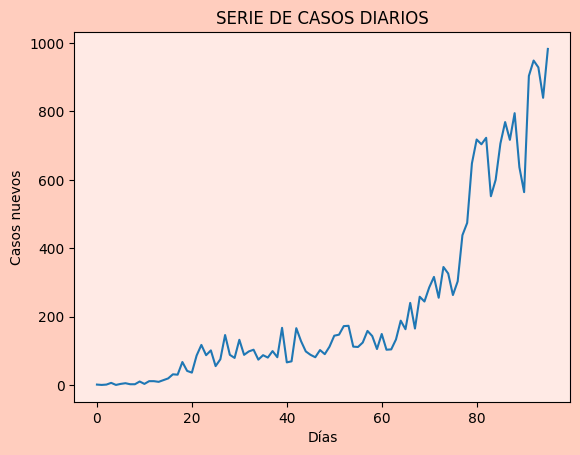

In [6]:
ruta_a_casos = (Path(os.getcwd()) / 'recs' / 'casos_coronavirus.csv').resolve()  # Para que funcione en Windows 

casos_covid = pd.read_csv(ruta_a_casos)  # Dataframe de casos
#casos_covid.head()  # Permite inspeccionar los datos
#casos_covid.info()  # Devuelve índices y estructura del dataframe


# Gráfico 1: serie de casos diariosb
casos_diarios = casos_covid.confirmados_Nuevos.values  # {dataframe}.{columna}.values
plt.plot(casos_diarios)
# Información
plt.title("SERIE DE CASOS DIARIOS")  # Título del gráfico
plt.xlabel('Días')  # Etiqueta del eje horizontal
plt.ylabel('Casos nuevos')  # Etiqueta del eje vertical
# Estilo
ax = plt.gca()  
ax.set_facecolor("#ffeae5")  # Color de fondo del gráfico
plt.gcf().patch.set_facecolor('#ffcdbe')  # Color de fondo del marco
plt.show()

#### **Suma acumulada** 
Consiste en sumar en cada celda el valor actual más todos los registros anteriores de esa columna. Fórmula: <span style='color: #ff3815'>$\displaystyle s_i = \sum_{k=1}^{i} c_k$ </span>

1. $i$ indica el registro para el cual se está calculando la suma *(de 1 hasta i)*.
2. $c_k$ es el valor de la columna en el k-ésimo registro.

---
<span style='color:#11ffbc'>Al suavizar la **fluctuación** entre valores consecutivos de una serie de datos que crece con el tiempo, permite visualizar la **tendencia general**, sin la influencia de las **variaciones a corto plazo** </span>.

---

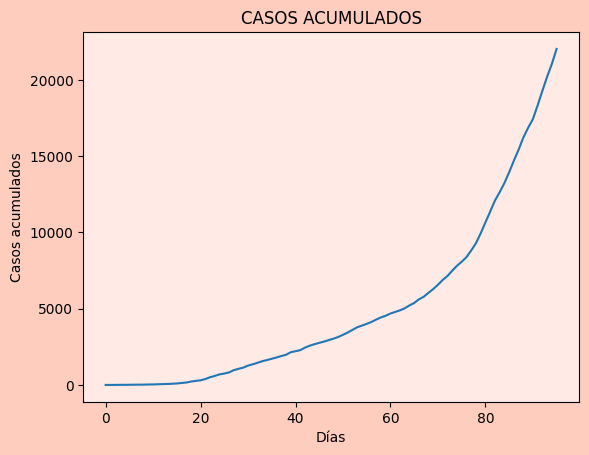

In [7]:
# Gráfico 2: cantidad de casos acumulados
casos_acumulados = casos_diarios.cumsum()  # Suma acumulada
plt.plot(casos_acumulados)
# Información
plt.title("CASOS ACUMULADOS")  # Título del gráfico
plt.xlabel('Días')  # Etiqueta del eje horizontal
plt.ylabel('Casos acumulados')  # Etiqueta del eje vertical
# Estilo
ax = plt.gca()  
ax.set_facecolor("#ffeae5")  # Color de fondo del gráfico
plt.gcf().patch.set_facecolor('#ffcdbe')  # Color de fondo del marco
plt.show()

#### **Linealizar**
En escala logarítmica, los crecimientos **exponenciales** (o con una tendencia similar) se tranforman a una relación aproximadamente **lineal**: el comportamiento de los datos se vuelve más **predecible** al suavizar la curva. La clave es asociar la **pendiente** a la **tasa de cambio** del fenómeno: 

- Pendiente constante $\leadsto$ crecimiento exponencial constante
- Pendiente decreciente $\leadsto$ desaceleración de casos
- Pendiente creciente $\leadsto$ aceleración de casos

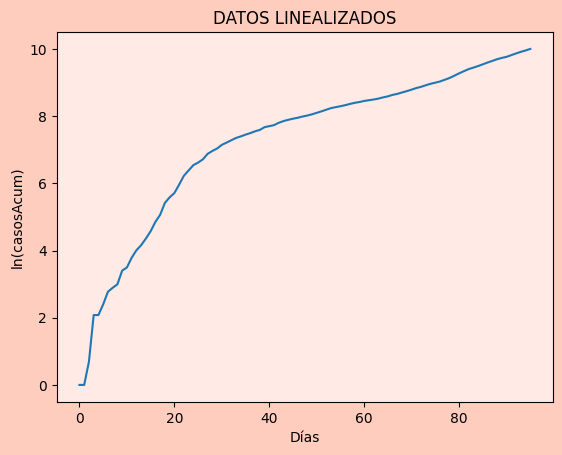

In [8]:
# Gráfico 3: datos linealizados
casos_acum_decim = np.float64(casos_acumulados)  # Enteros a punto flotante
log_casos_acum = np.log(casos_acum_decim)  # Le tomo el logaritmo natural
plt.plot(log_casos_acum)
# Información
plt.title("DATOS LINEALIZADOS")
plt.xlabel('Días')  # Etiqueta del eje horizontal
plt.ylabel('ln(casosAcum)')  # Etiqueta del eje vertical
# Estilo
ax = plt.gca()  
ax.set_facecolor("#ffeae5")  # Color de fondo del gráfico
plt.gcf().patch.set_facecolor('#ffcdbe')  # Color de fondo del marco
plt.show()

##### Linealizar (alt.)

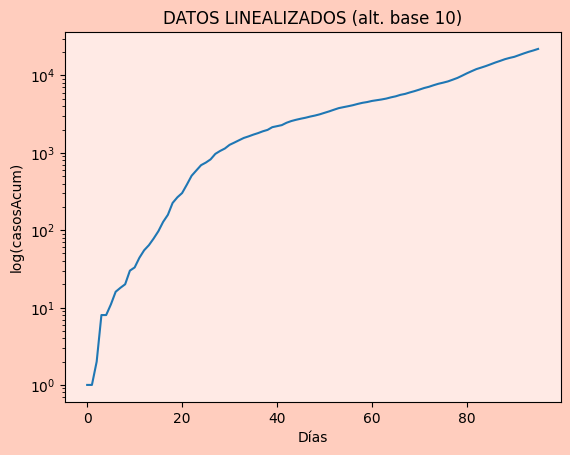

In [9]:
plt.plot(casos_acumulados)
plt.yscale('log')  # En base 10 (ln: plt.yscale('log', basey=np.e))
# Información
plt.title("DATOS LINEALIZADOS (alt. base 10)")  # Título del gráfico
plt.xlabel('Días')  # Etiqueta del eje horizontal
plt.ylabel('log(casosAcum)')  # Etiqueta del eje vertical
# Estilo
ax = plt.gca()  
ax.set_facecolor("#ffeae5")  # Color de fondo del gráfico
plt.gcf().patch.set_facecolor('#ffcdbe')  # Color de fondo del marco
plt.show()

## **EJERCICIOS GUÍA 3**: *visualización*

### Ejercicio 1

#### a) Curva de la expectativa de vida en Argentina en función del año *(datos de Gapminder)*

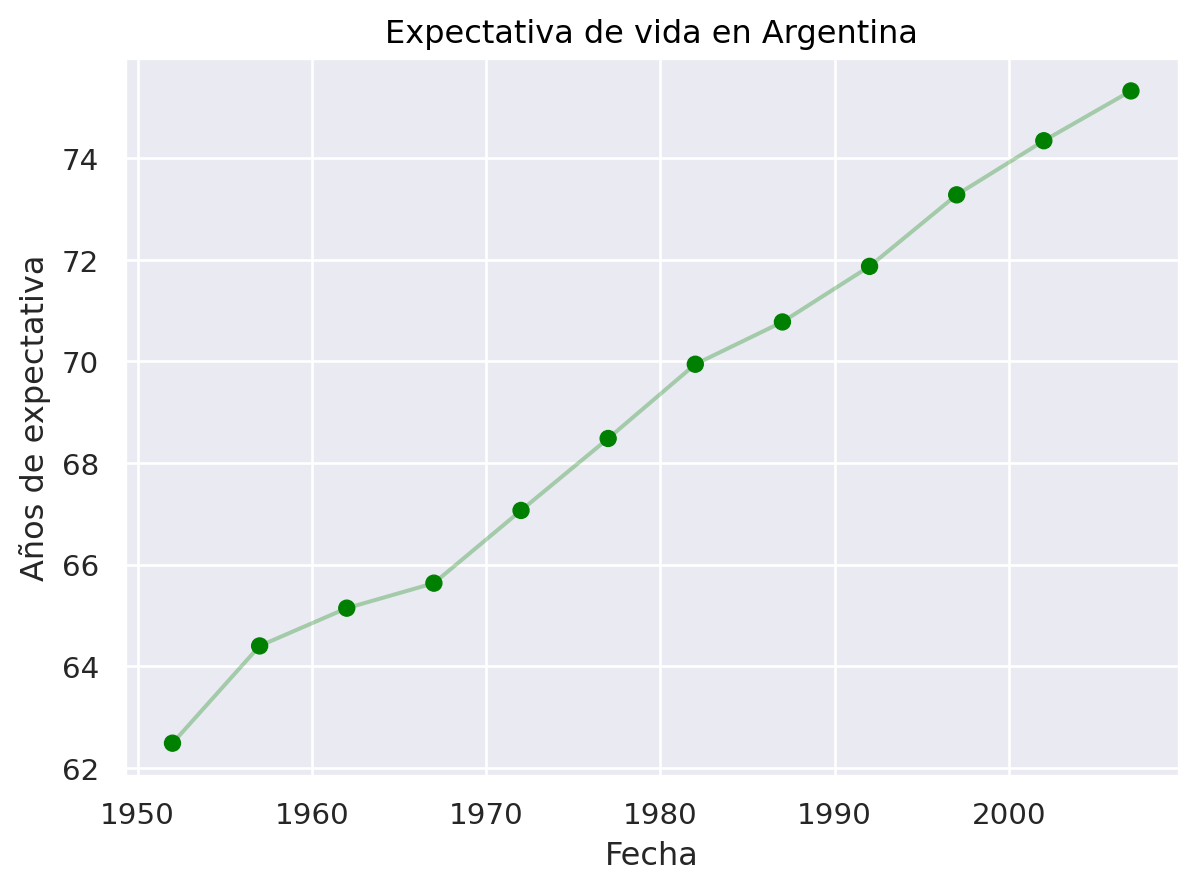

In [10]:
from gapminder import gapminder

# Obtengo los datos
datos_arg = gapminder[gapminder['country']=='Argentina'].reset_index(drop=True)

# Visualizo
(
    so.Plot(data=datos_arg, x='year', y='lifeExp')
    .add(so.Line(color='green', alpha=0.3))
    .add(so.Dot(color='green', alpha=1))
    .label(
        x="Fecha",
        y="Años de expectativa",
        title="Expectativa de vida en Argentina"
    )
)

#### b) Curvas de la expectativa de vida de los paı́ses de América en función del año

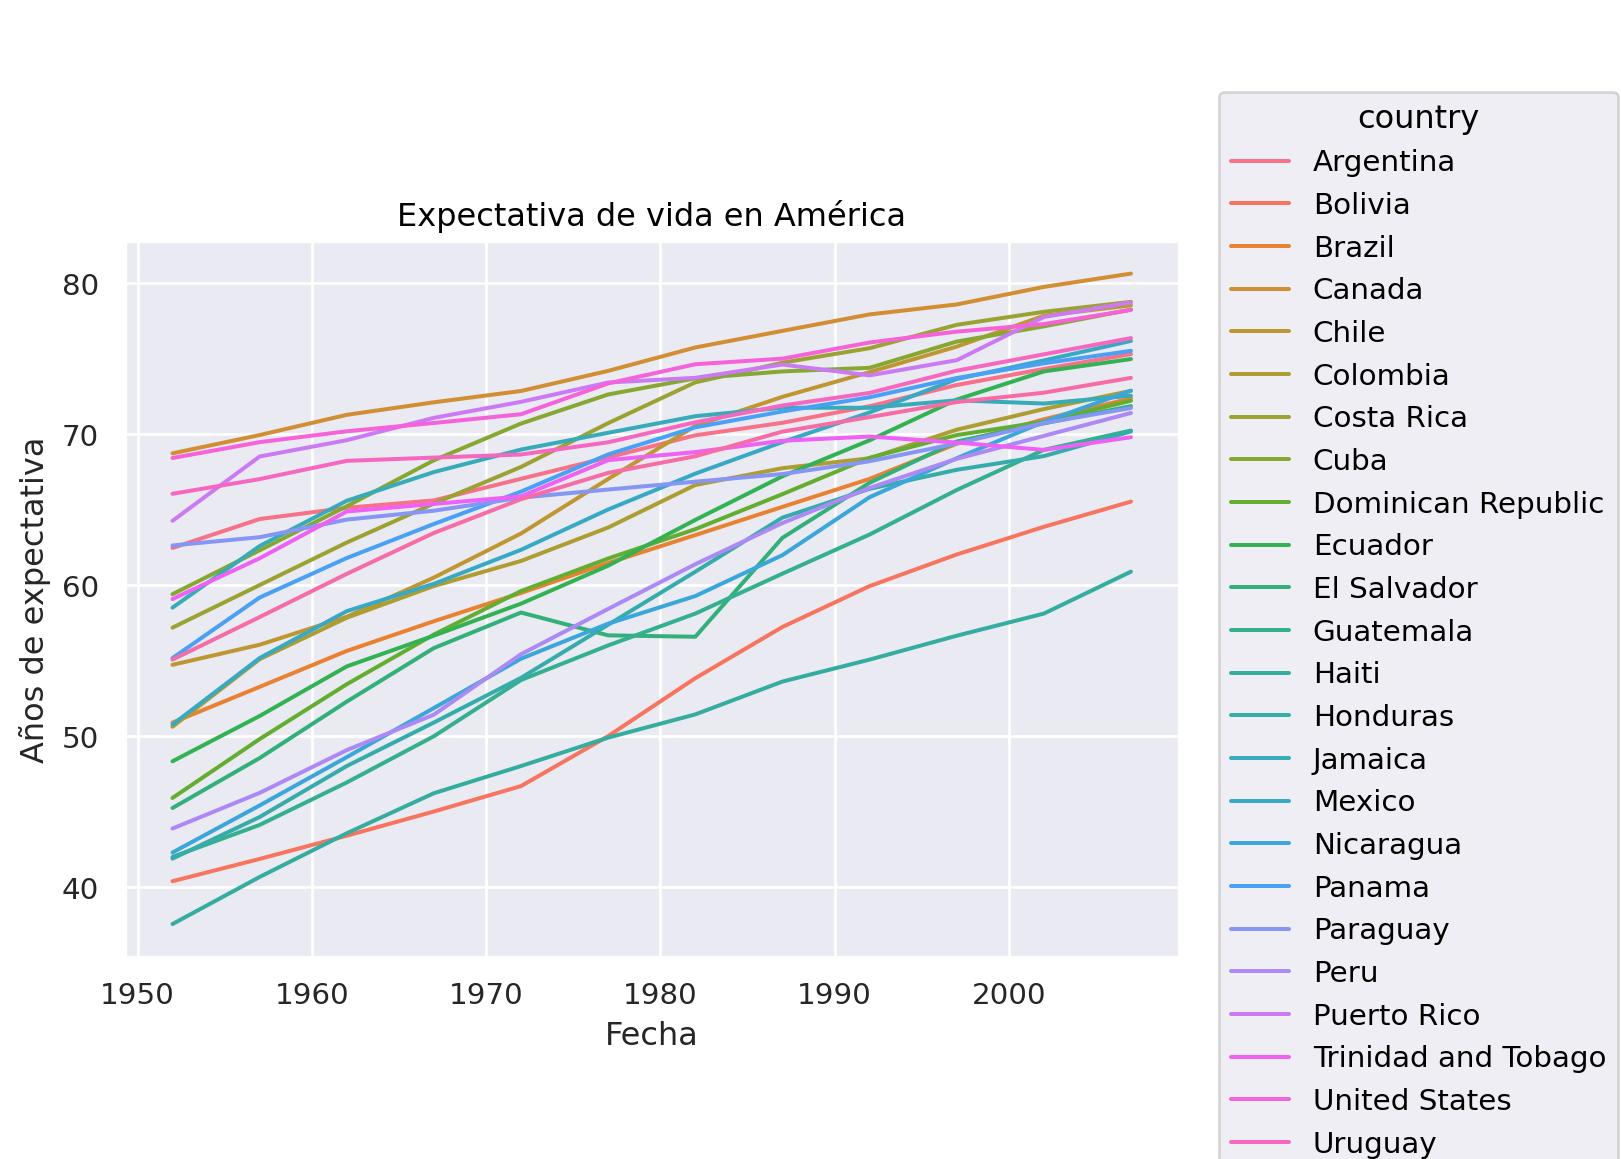

In [11]:
datos_america = gapminder[gapminder['continent'] == 'Americas']

(
    so.Plot(data=datos_america, x='year', y='lifeExp', group='country', color='country')
    .add(so.Line())
    .label(
        x="Fecha",
        y="Años de expectativa",
        title="Expectativa de vida en América"
    )
)

#### c) Curva de tendencia

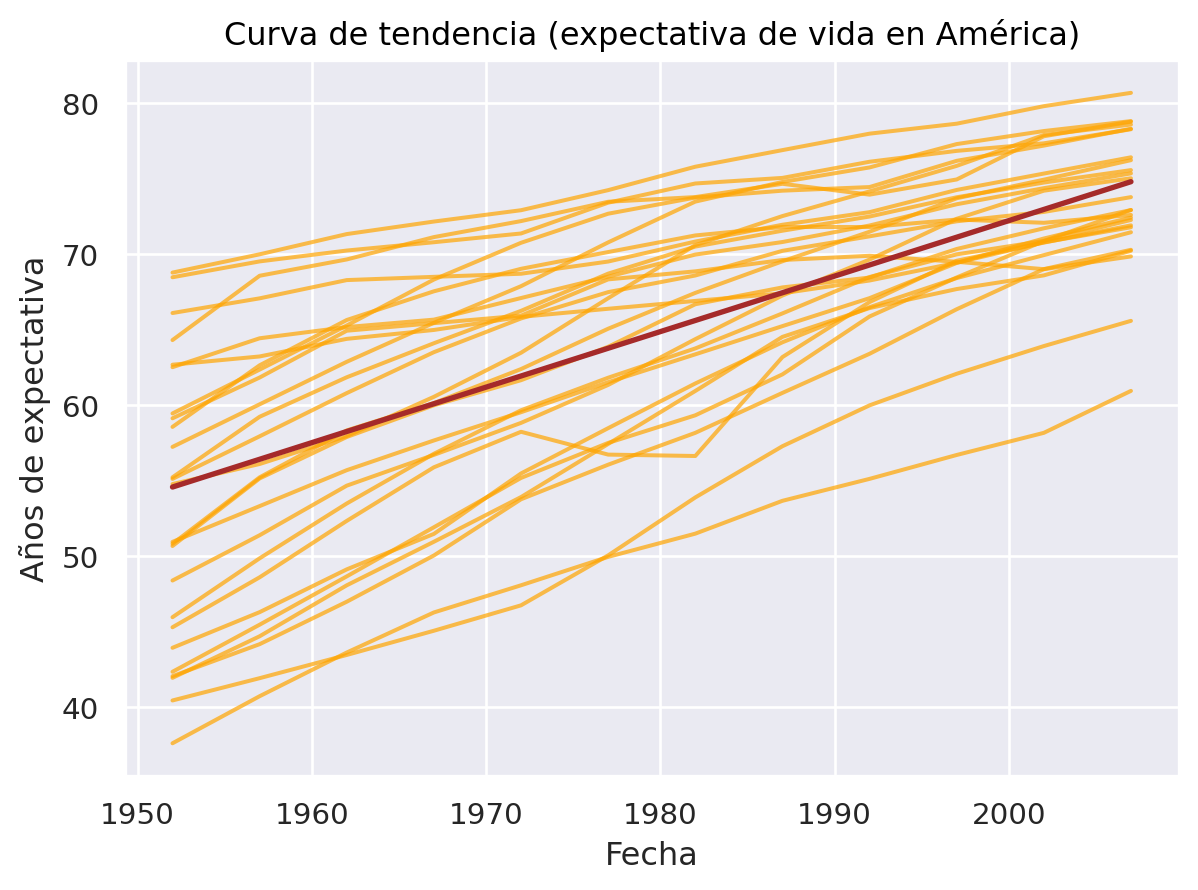

In [12]:
(
    so.Plot(data=datos_america, x='year', y='lifeExp')
    .add(so.Line(color='orange', alpha=0.7), group='country')
    .add(so.Line(color='brown', linewidth=2), so.PolyFit(1))  # Con '2' genero regresión cudrática en lugar de lineal
    .label(
        x="Fecha",
        y="Años de expectativa",
        title="Curva de tendencia (expectativa de vida en América)"
    )
)

#### d) Curvas de expectativa agrupadas por continente

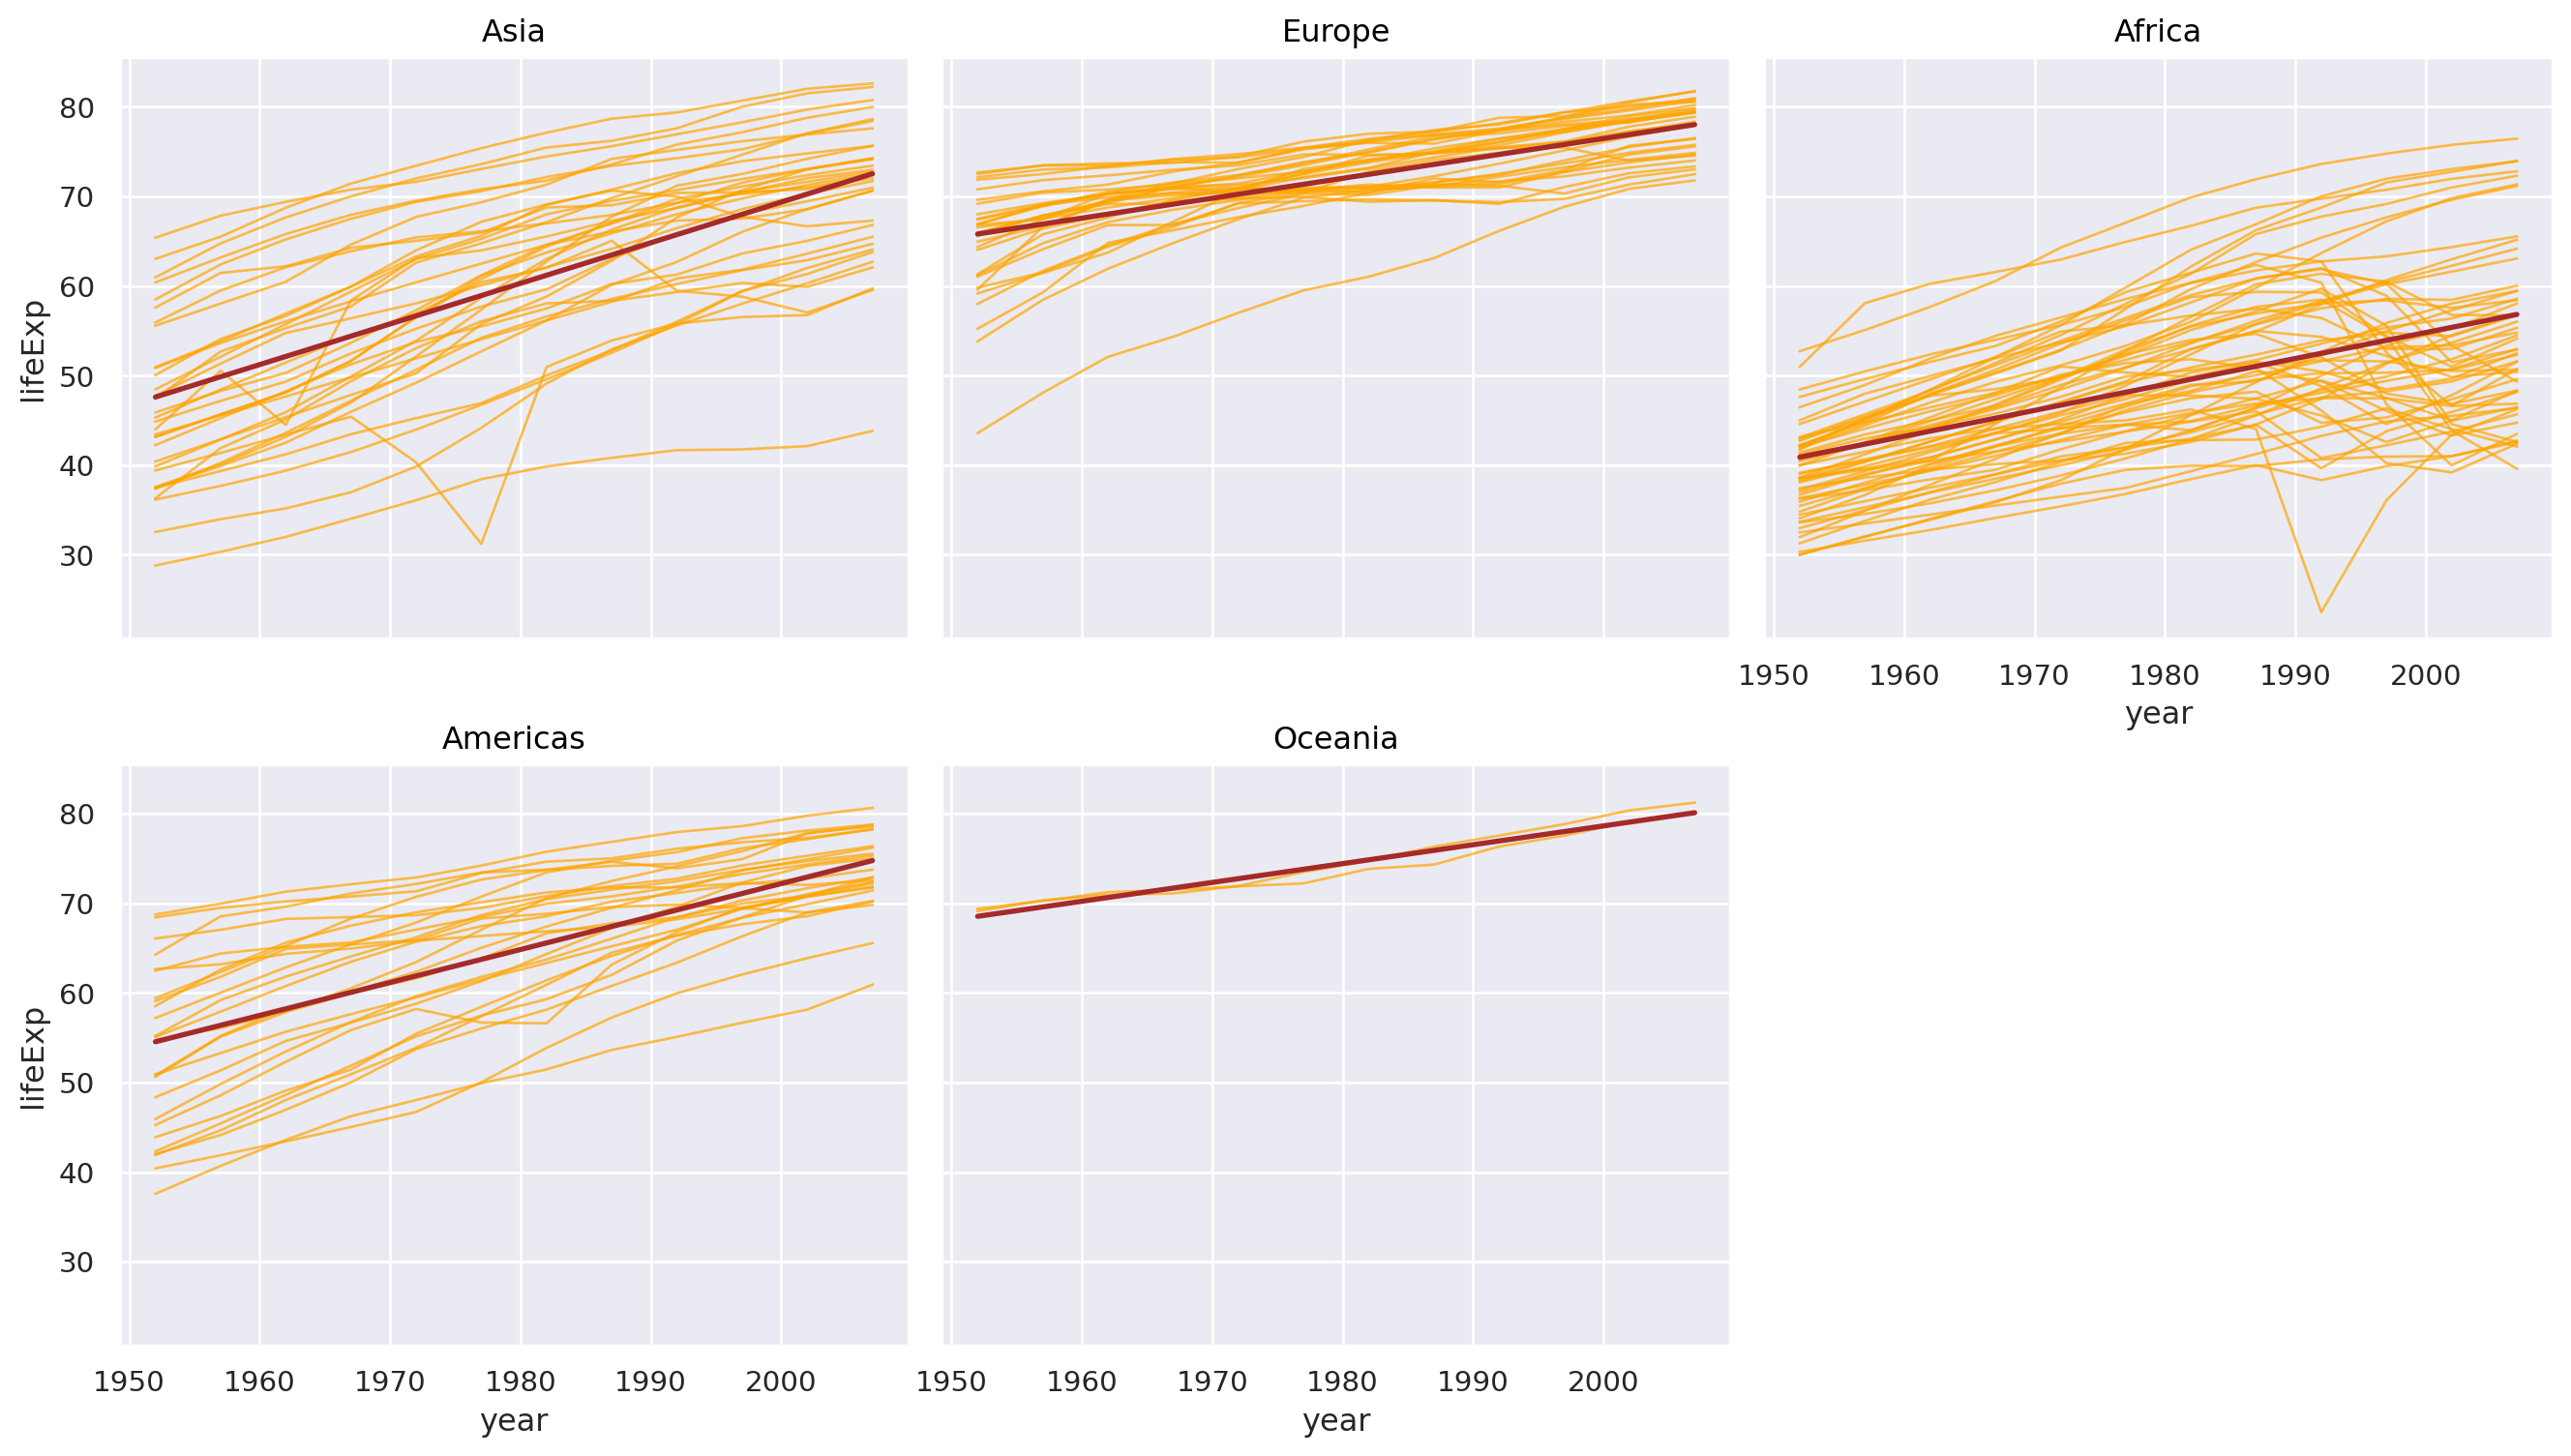

In [13]:
(
    so.Plot(data = gapminder, x='year', y='lifeExp')
    .add(so.Lines(color='orange', alpha=0.7, linewidth=1), group='country')
    .add(so.Line(color='brown', linewidth=2), so.PolyFit(1))
    .facet('continent', wrap=3)
    .layout(size=(14, 8))
)

### Ejercicio 2

In [37]:
pings = sns.load_dataset('penguins') 
print(pings)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

### Ejercicio 3

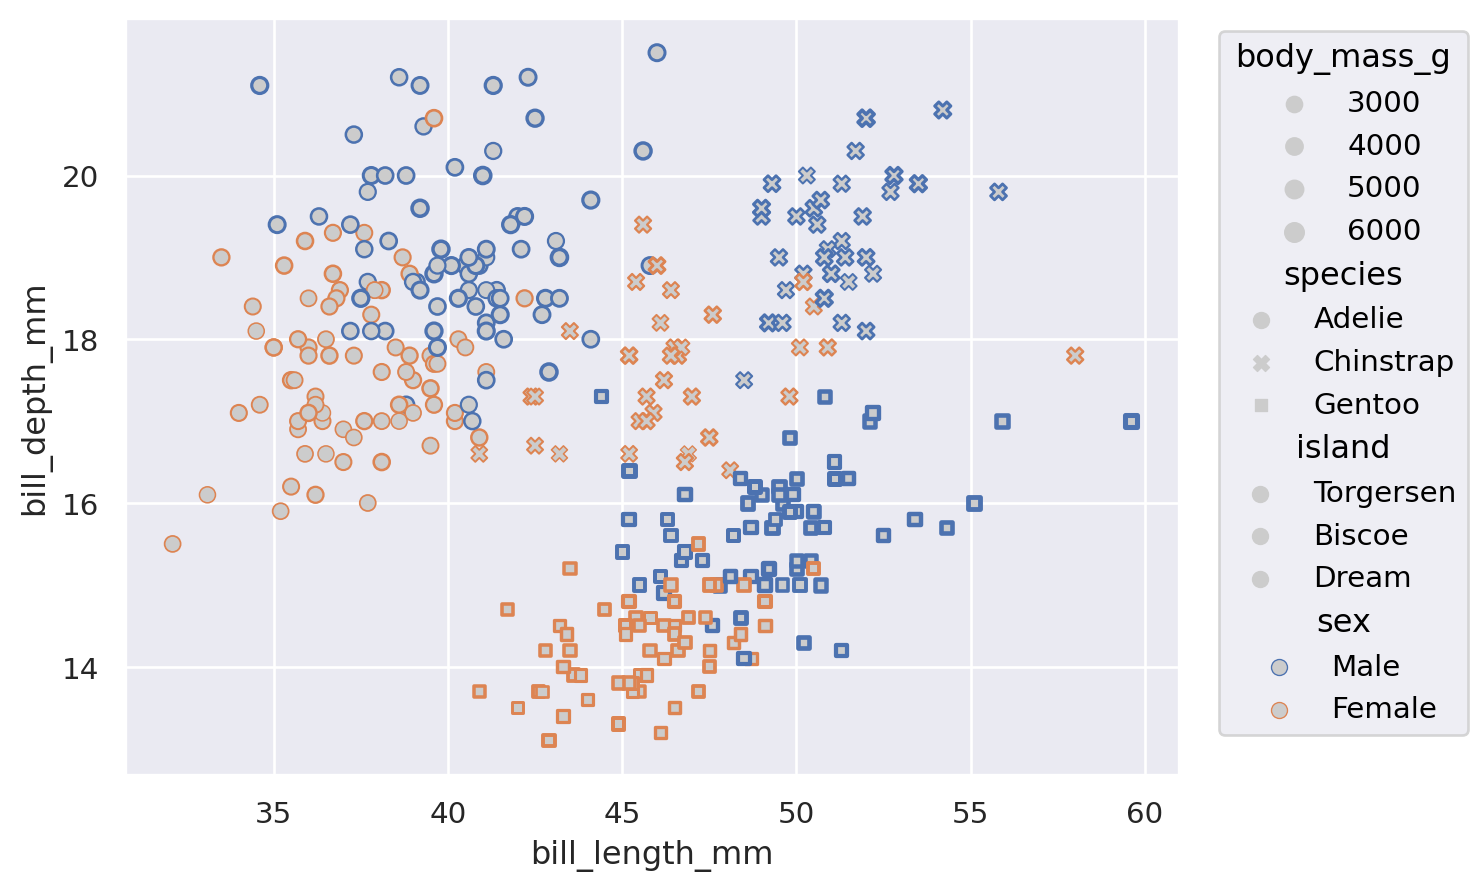

In [15]:
(
    so.Plot(
        data=pings, x='bill_length_mm', y='bill_depth_mm',
        edgewidth='body_mass_g', marker='species',
        linestyle='island', color='species'
    )
    .add(so.Dot(color='.8'), edgecolor='sex')
)

### Ejercicio 4
Al codificar la especie por medio del color de la marca, se entiende mejor la distribución de los datos en subgrupos.


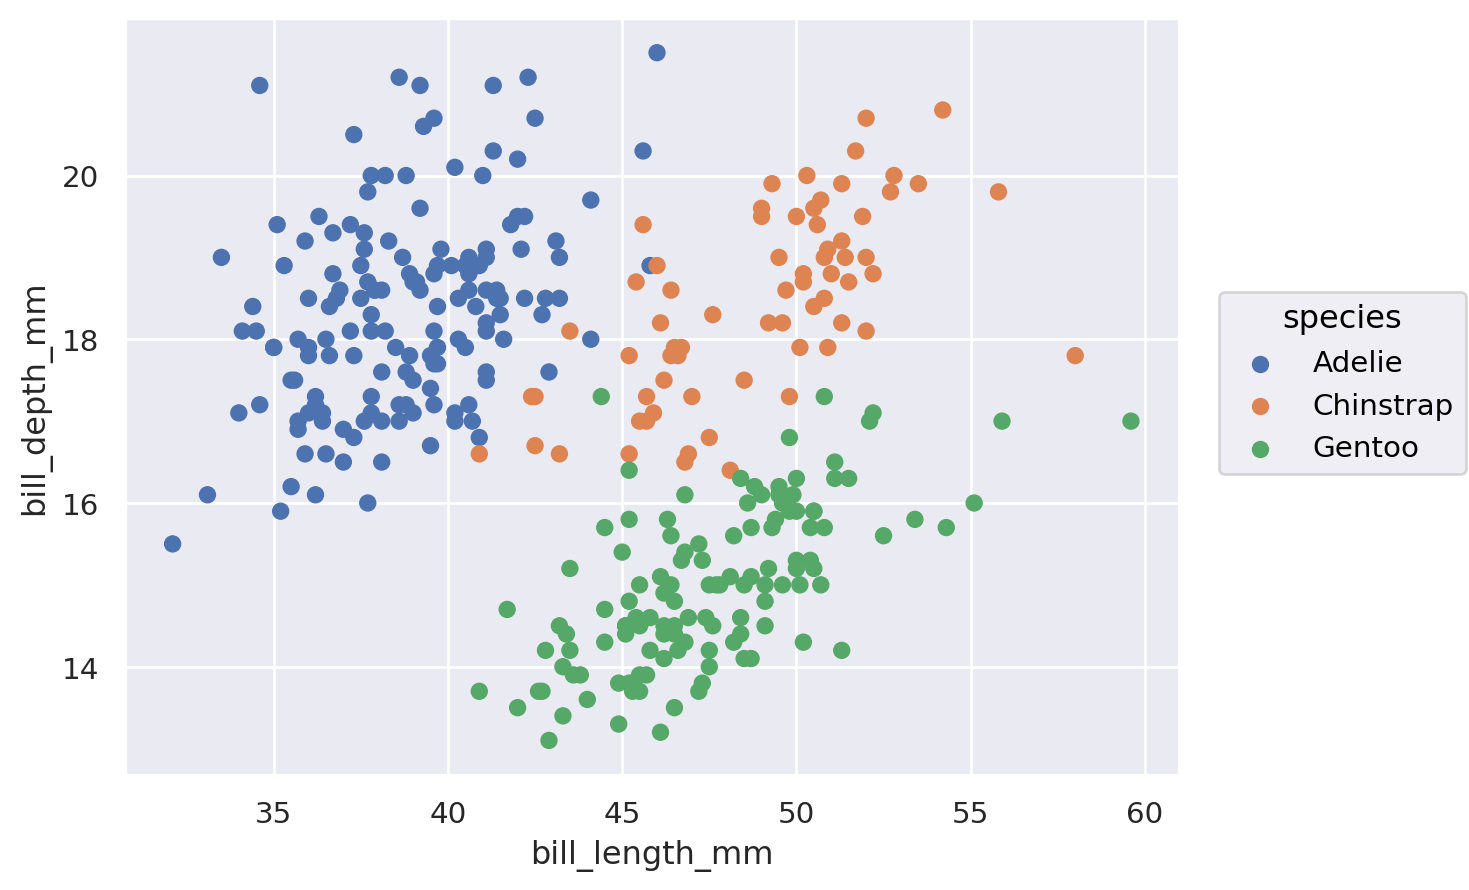

In [16]:
(
    so.Plot(data=pings, x='bill_length_mm', y='bill_depth_mm')
    .add(so.Dot(), color='species')
)

### Ejercicio 5

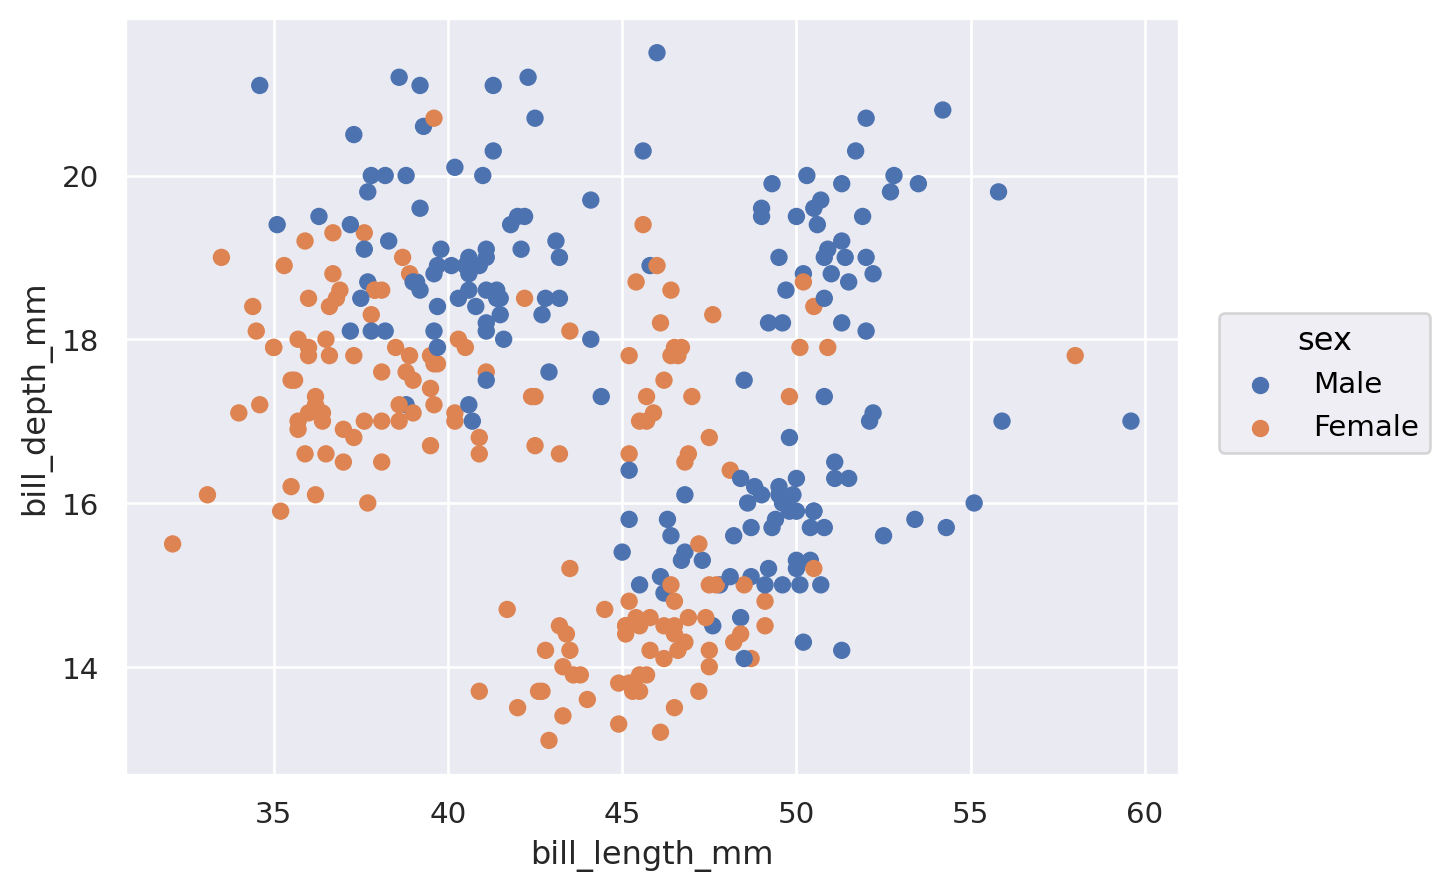

In [43]:
(
    so.Plot(data=pings, x='bill_length_mm', y='bill_depth_mm')
    .add(so.Dot(), color='sex')
)

#### a)
En cada especie, los machos tienden a tener el pico más grande.

#### b)

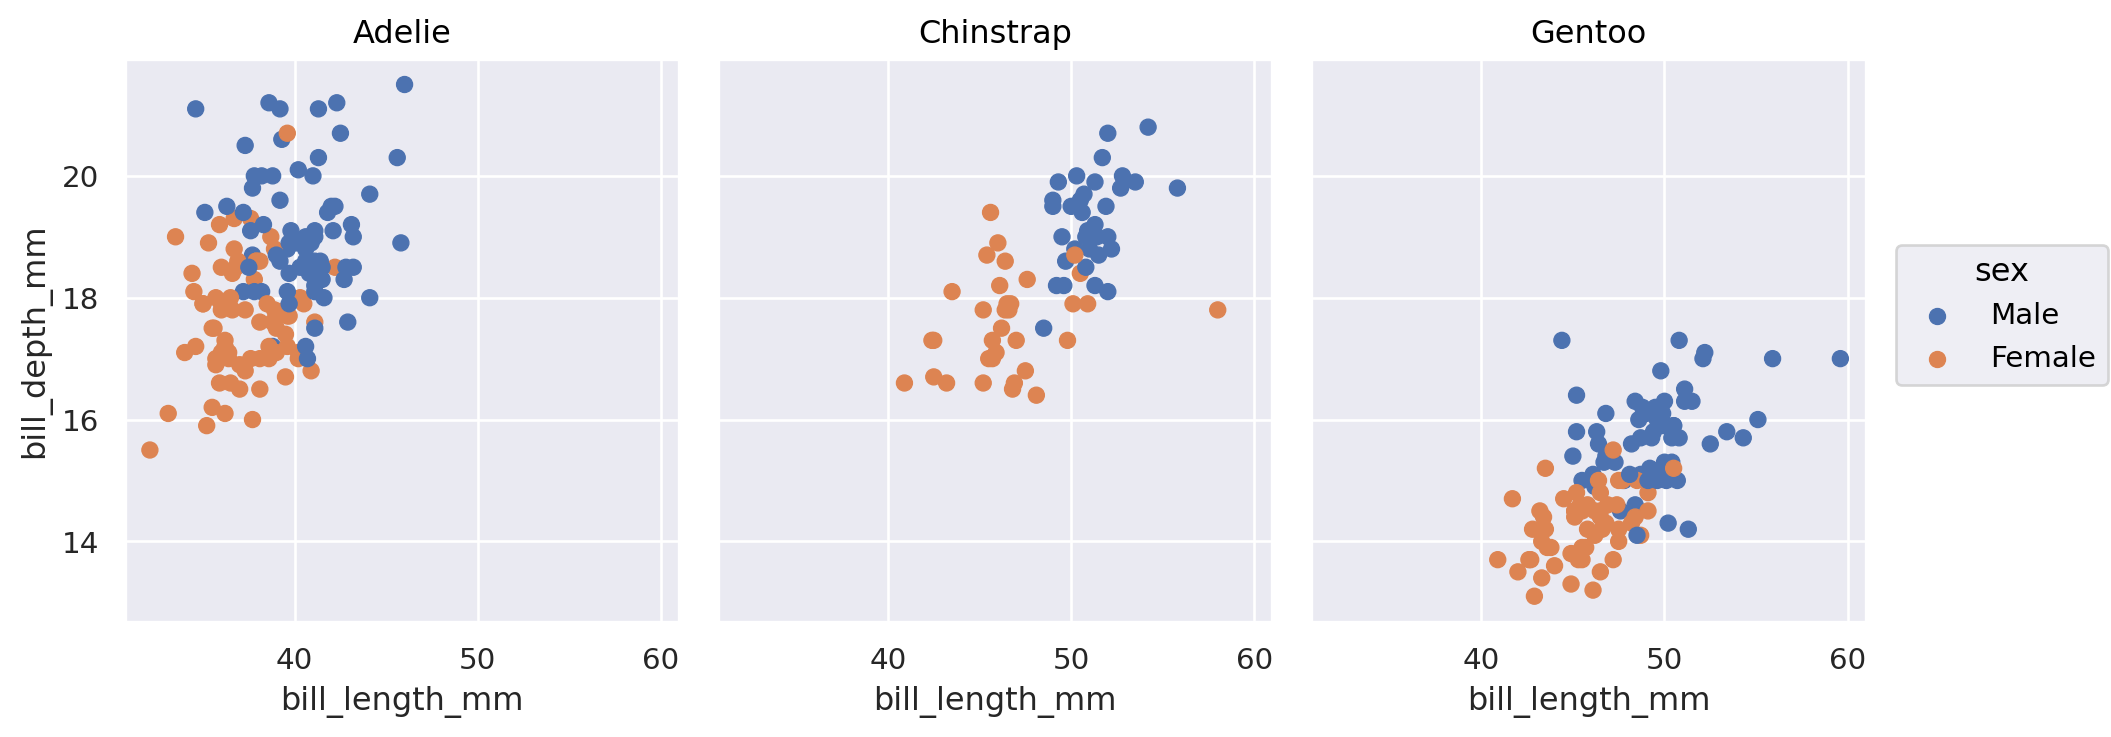

In [18]:
(
    so.Plot(data=pings, x='bill_length_mm', y='bill_depth_mm')
    .add(so.Dot(), color='sex')
    .facet('species')
    .layout(size=(10, 4))
)

### Ejercicio 6
#### a)

In [19]:
pings.groupby('island').size()

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

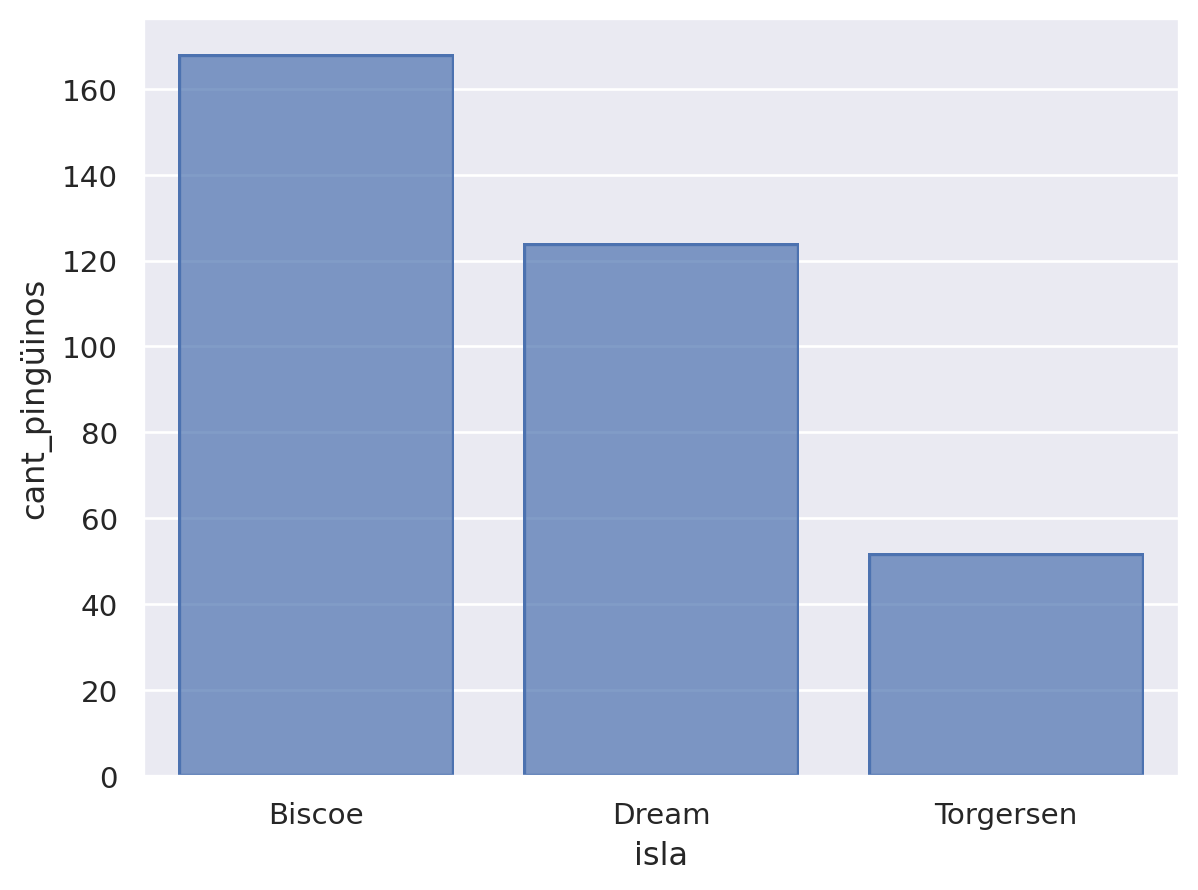

In [51]:
pings_por_isla = pings.groupby('island').size().reset_index(name='cant_pingüinos')
pings_por_isla.rename(columns={'island':'isla'}, inplace=True)
# display(pings_por_isla)

(
    so.Plot(data=pings_por_isla, x='isla', y='cant_pingüinos')
    .add(so.Bar())
)

#### c, d) 
Puedo hacer el **histograma** directamente, donde *"el tamaño de la barra representa la cantidad de veces que se repite cada valor de la variable categórica en la serie"*: el **eje y** codifica **cantidades** o **frecuencias**.

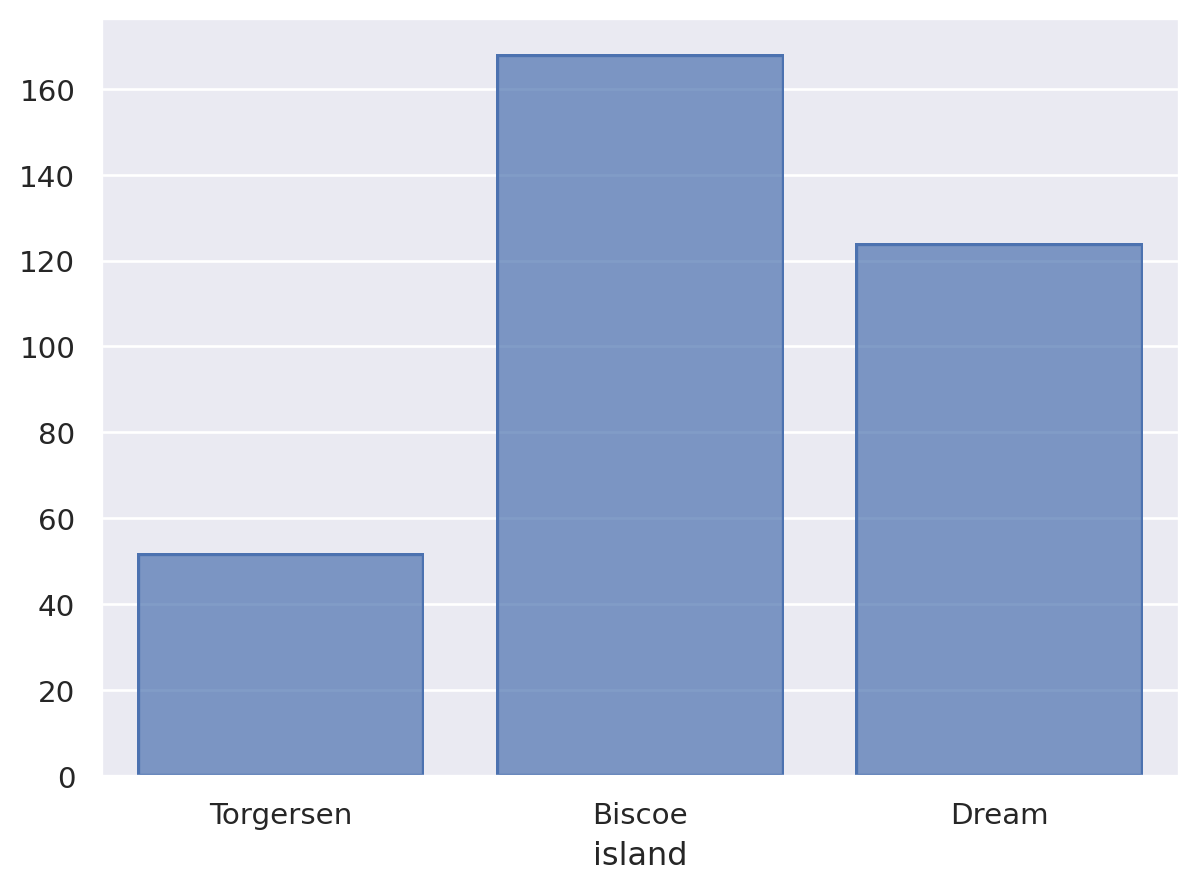

In [53]:
(
    so.Plot(data = pings, x='island')
    .add(so.Bar(), so.Hist())
)

#### e)

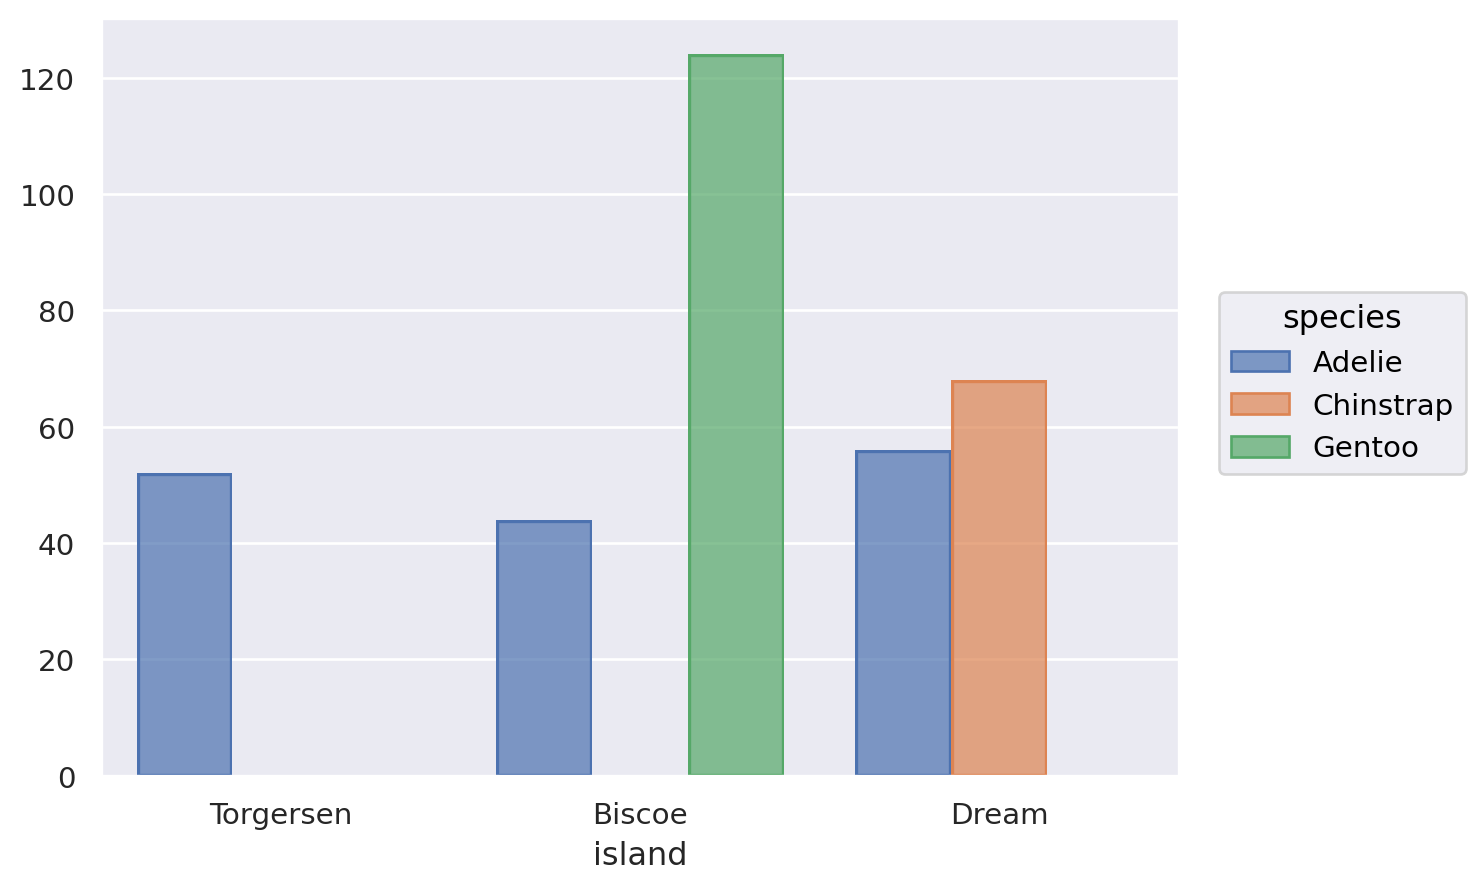

In [58]:
(
    so.Plot(data=pings, x='island')
    # Dodge crea barras distintas según las categorías
    # especifícadas en color='...'
    .add(so.Bar(), so.Hist(), so.Dodge(), color='species')  
)

#### f)
Misma visualización pero usando `facet()`

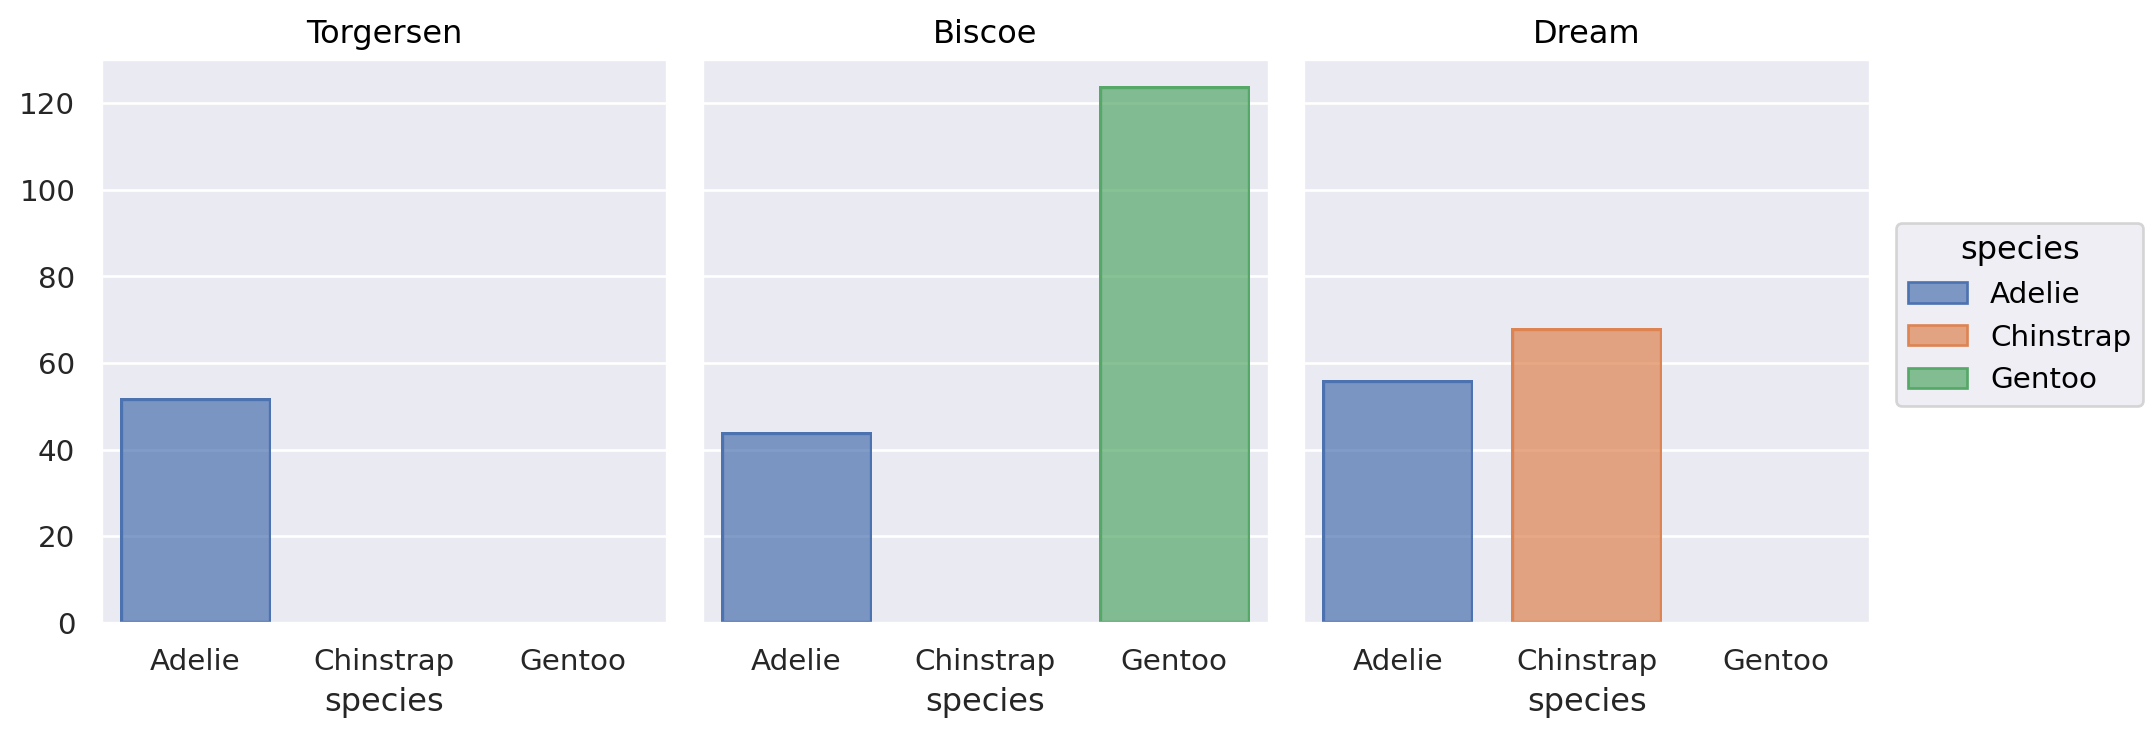

In [61]:
(
    so.Plot(data=pings, x='species', color='species')
    .add(so.Bar(), so.Hist())
    .facet('island')
    .layout(size=(10, 4))
)

### Ejercicio 7
**Histograma** de la cantidad de pingüinos en función del tamaño del ala.

Tamaño del ala |  Máximo : 231.0; mínimo: 172.0; media: 200.91520467836258; mediana: 197.0


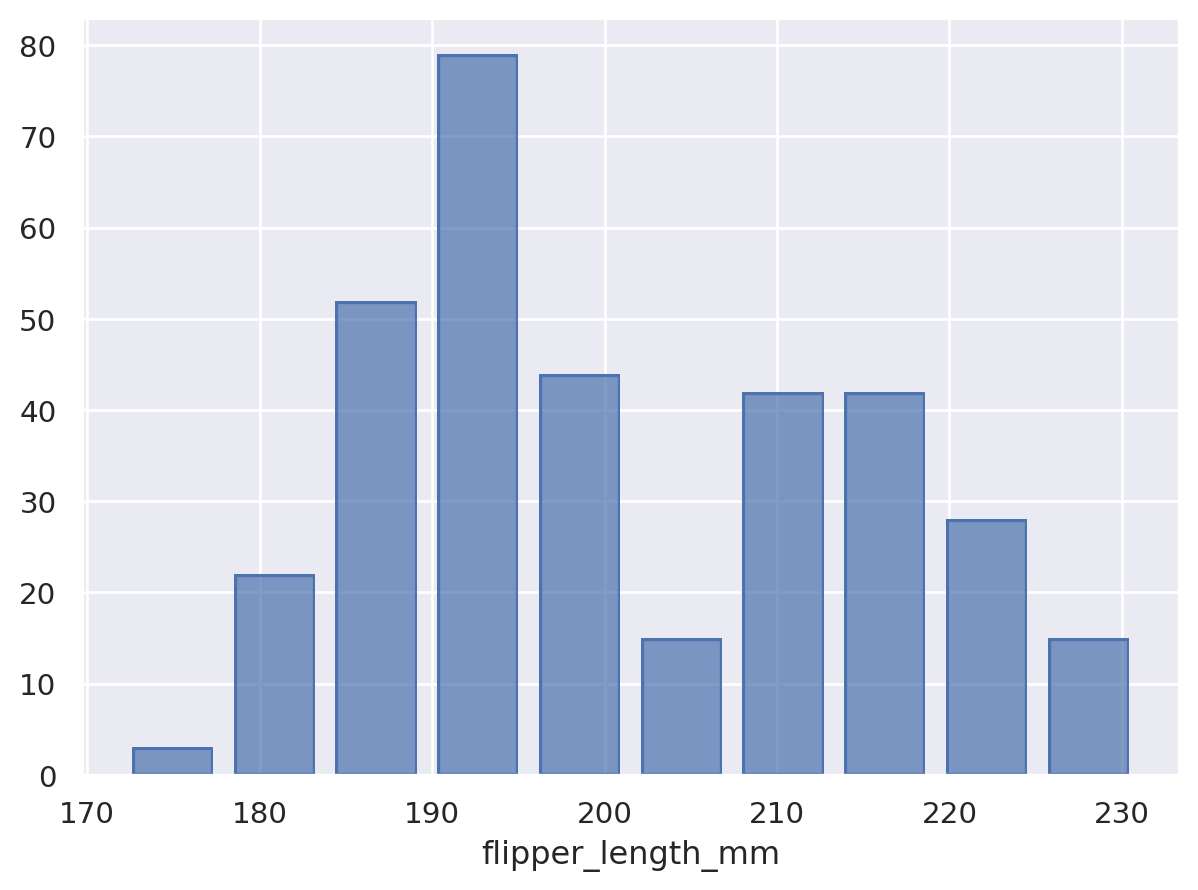

In [71]:
maximo = pings['flipper_length_mm'].max()
minimo = pings['flipper_length_mm'].min()
media = pings['flipper_length_mm'].mean()
mediana = pings['flipper_length_mm'].median()

print(f'Tamaño del ala |  Máximo : {maximo}; mínimo: {minimo}; media: {media}; mediana: {mediana}')
(
    so.Plot(data=pings, x='flipper_length_mm')
    .add(so.Bar(), so.Hist())
)


### Ejercicio 8
#### a)

In [92]:
mtc = 'Medidas de tendencia central'
maximo = pings['bill_depth_mm'].max()
minimo = pings['bill_depth_mm'].min()
media = pings['bill_depth_mm'].mean()
mediana = pings['bill_depth_mm'].median()
moda = pings['bill_depth_mm'].mode().item()  # Funciona porque solo hay una moda

mdd = 'Medidas de dispersión'
varianza = pings['bill_depth_mm'].var()
desvio = pings['bill_depth_mm'].std()

print(f'{'-'*len(mtc)}\n{mtc}\n{'-'*len(mtc)}')
print(f'Máximo : {maximo}\nMínimo: {minimo}\nMedia: {np.round(media,3)}\nMediana: {mediana}\nModa: {moda}\n')
print(f'{'-'*len(mdd)}\n{mdd}\n{'-'*len(mdd)}')
print(f'Varianza: {np.round(varianza, 3)}\nDesvío estándar: {np.round(desvio,3)}')

----------------------------
Medidas de tendencia central
----------------------------
Máximo : 21.5
Mínimo: 13.1
Media: 17.151
Mediana: 17.3
Moda: 17.0

---------------------
Medidas de dispersión
---------------------
Varianza: 3.9
Desvío estándar: 1.975


#### b)

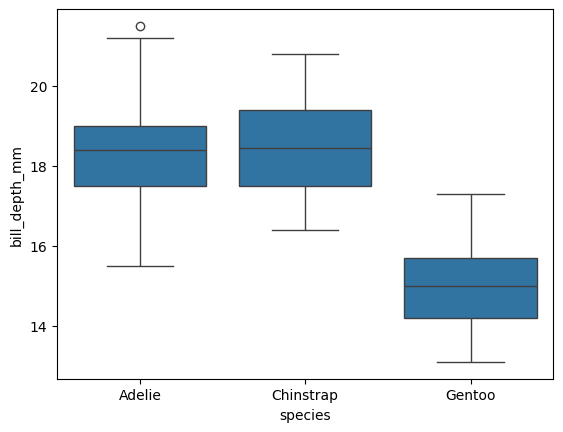

In [77]:
sns.boxplot(data=pings, x='species', y='bill_depth_mm')
plt.show()

### Ejercicio 9
#### a) 
En la especie Adelie la relación entre peso corporal y tamaño del pico (profundidad y longitud) resulta clara. En la especie Chinstrap los puntos parecen estar más dispersos, la relación resulta menos clara. En la especie Gentoo es donde hay menos variación en el peso, aunque puede notarse una tendencia picos más grandes en los individuos con más peso. En cada especie la relación general es que a mayor longitud mayor profundidad. 

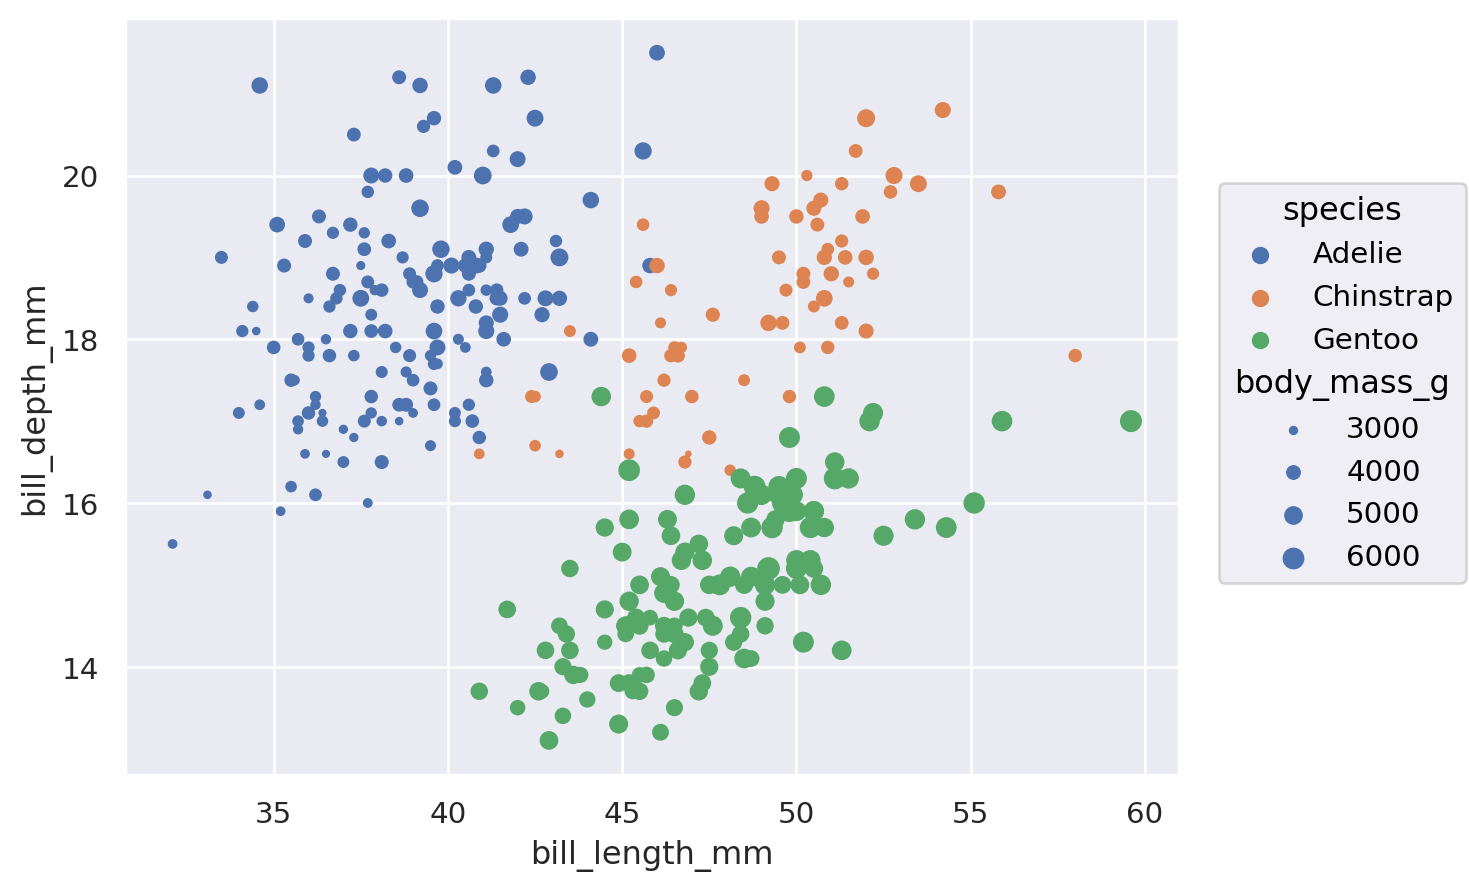

In [93]:
(
    so.Plot(data=pings, x='bill_length_mm', y='bill_depth_mm')
    .add(so.Dot(), color='species', pointsize='body_mass_g')
)

#### b)
El 50% de los individuos de la especie Gentoo pesan entre 4600 y 5500 gramos aprox, superando a buena parte de las otras dos especies.

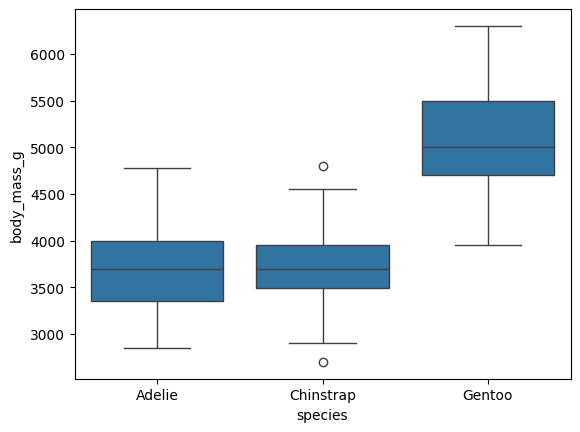

In [94]:
sns.boxplot(data=pings, x='species', y='body_mass_g')
plt.show()

### Ejercicio 12
#### a)

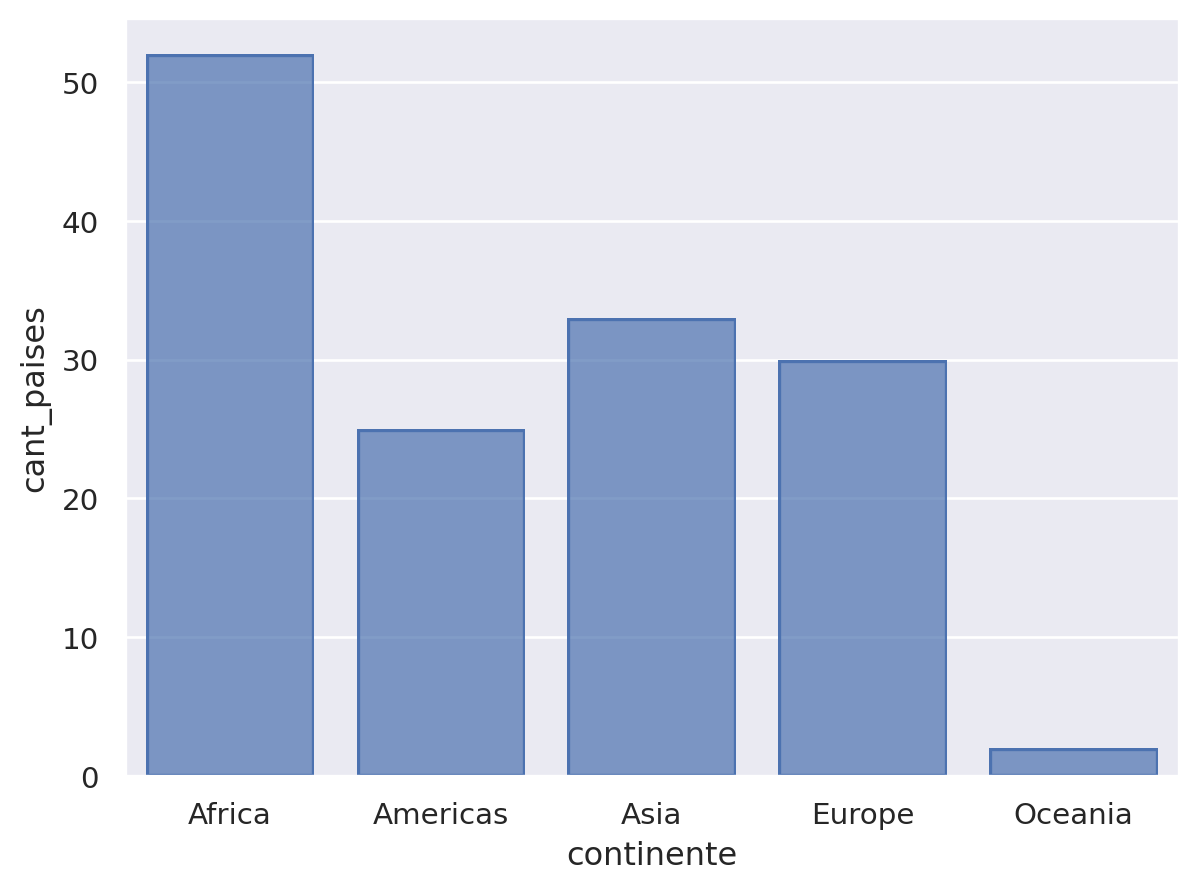

In [112]:
paises = gapminder.groupby('continent')['country'].nunique().reset_index(name='cant_paises')
paises.rename(columns={'continent':'continente'}, inplace=True)

(
    so.Plot(data=paises, x='continente', y='cant_paises')
    .add(so.Bar())
)

#### b)

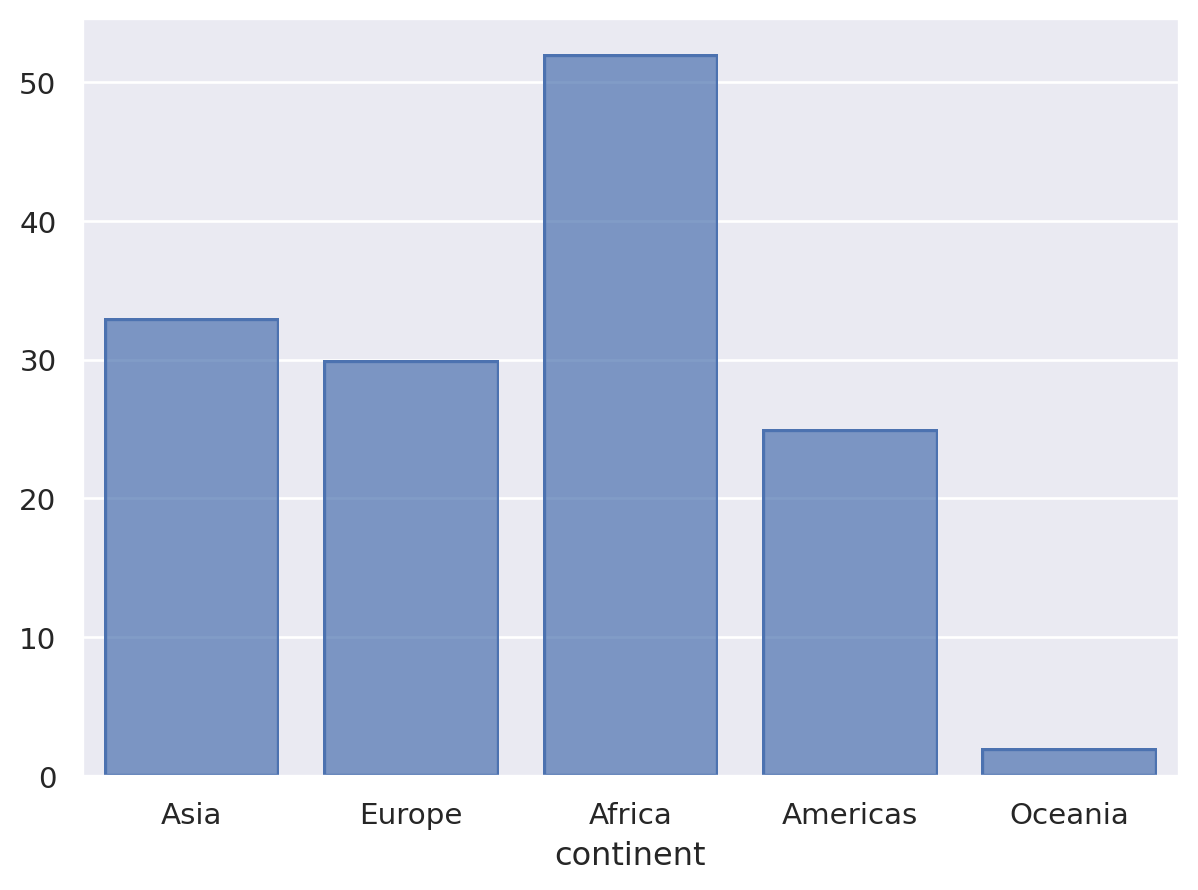

In [126]:
(
    so.Plot(data=gapminder.drop_duplicates(subset='country'), x='continent')  # Solo me quedo con la primera aparición de cada país
    .add(so.Bar(), so.Hist())
)

### Ejercicio 13

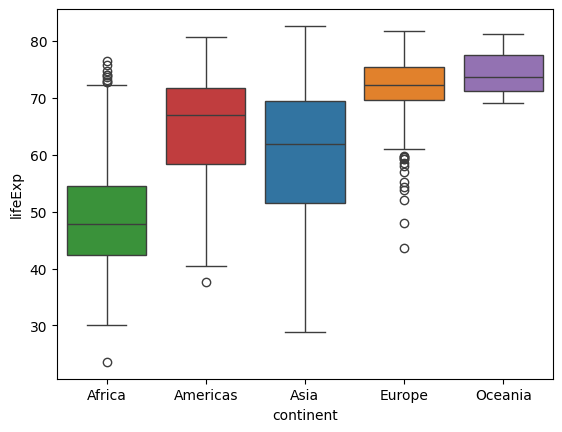

In [145]:
sns.boxplot(
    data=gapminder, 
    x='continent', 
    y='lifeExp', 
    hue='continent', 
    order= np.sort(gapminder.continent.unique())
)
plt.show()

## **EJERCICIOS GUÍA 4**: *regresión lineal y cuadrados mínimos*

### Ejercicio 1
#### a, b)

In [112]:
def coeficientes_regresion_lineal(X, y):  
    # x (predictor), y (var a predecir) pueden ser pd.Series o np.array 
    vec_x = X.to_numpy() if isinstance(X, pd.Series) else np.asarray(X)
    vec_y = y.to_numpy() if isinstance(y, pd.Series) else np.asarray(y)
    # Obtengo los promedios
    promedio_x = np.mean(vec_x)
    promedio_y = np.mean(vec_y)
    # Calculo los coeficientes
    beta_1 = np.sum((vec_x - promedio_x) * (vec_y - promedio_y)) / np.sum((vec_x - promedio_x)**2)
    beta_0 = promedio_y - (beta_1 * promedio_x)

    return beta_0, beta_1  


# Obtengo los datos
from gapminder import gapminder
datos = gapminder[gapminder['country'] == 'Argentina'].reset_index(drop=True)

# y ~ X se lee: "X explica y")
y, X = Formula('lifeExp ~ year').get_model_matrix(datos) # Obtengo las matrices del modelo 

# Genero el modelo
modelo = linear_model.LinearRegression(fit_intercept=False)
# Hago el ajuste
modelo.fit(X, y)

beta_0 =  modelo.coef_[0][0]
beta_1 =  modelo.coef_[0][1]

# Resultados
b0, b1 = coeficientes_regresion_lineal(datos.year, datos.lifeExp)
print(f'Cálculo con Formulaic y scikit-learn: beta_0 = {beta_0}, beta_1 = {beta_1}')  # Cálculo con scikit-learn
print(f'Cálculo manula: beta_0 = {b0}, beta_1 = {b1}')  # Cálculo manual
print(f'Mismos resultados: {np.isclose(beta_0, b0) and np.isclose(beta_1, b1)}')


Cálculo con Formulaic y scikit-learn: beta_0 = -389.6063445221505, beta_1 = 0.23170839160839457
Cálculo manula: beta_0 = -389.6063445221445, beta_1 = 0.2317083916083916
Mismos resultados: True


### Ejercicio 2
#### a) Relación entre superficie y precio de cada inmueble

In [98]:
ruta_a_inmuebles = (Path(os.getcwd()) / 'recs' / 'inmuebles.csv').resolve()
datos_inmuebles = pd.read_csv(ruta_a_inmuebles)
datos_inmuebles.head()

superficie      precio    zona
0       110.0  454.425690  Zona 2
1       109.0  383.004114  Zona 2
2       101.0  437.362638  Zona 2
3        58.0  304.392486  Zona 3
4       129.0  620.027722  Zona 3

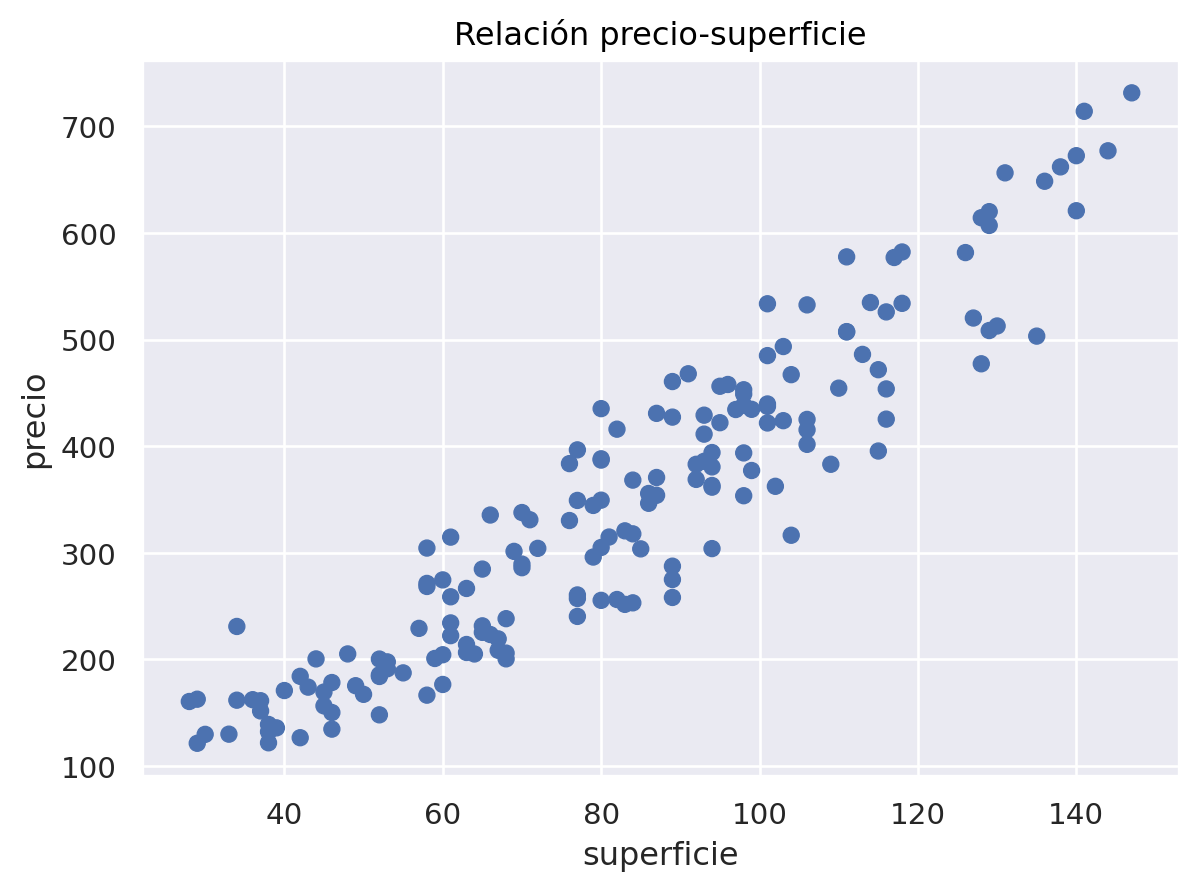

In [99]:
(
    so.Plot(datos_inmuebles, 'superficie', 'precio')
    .add(so.Dot())
    .label(
        title="Relación precio-superficie"
    )
)

#### b)

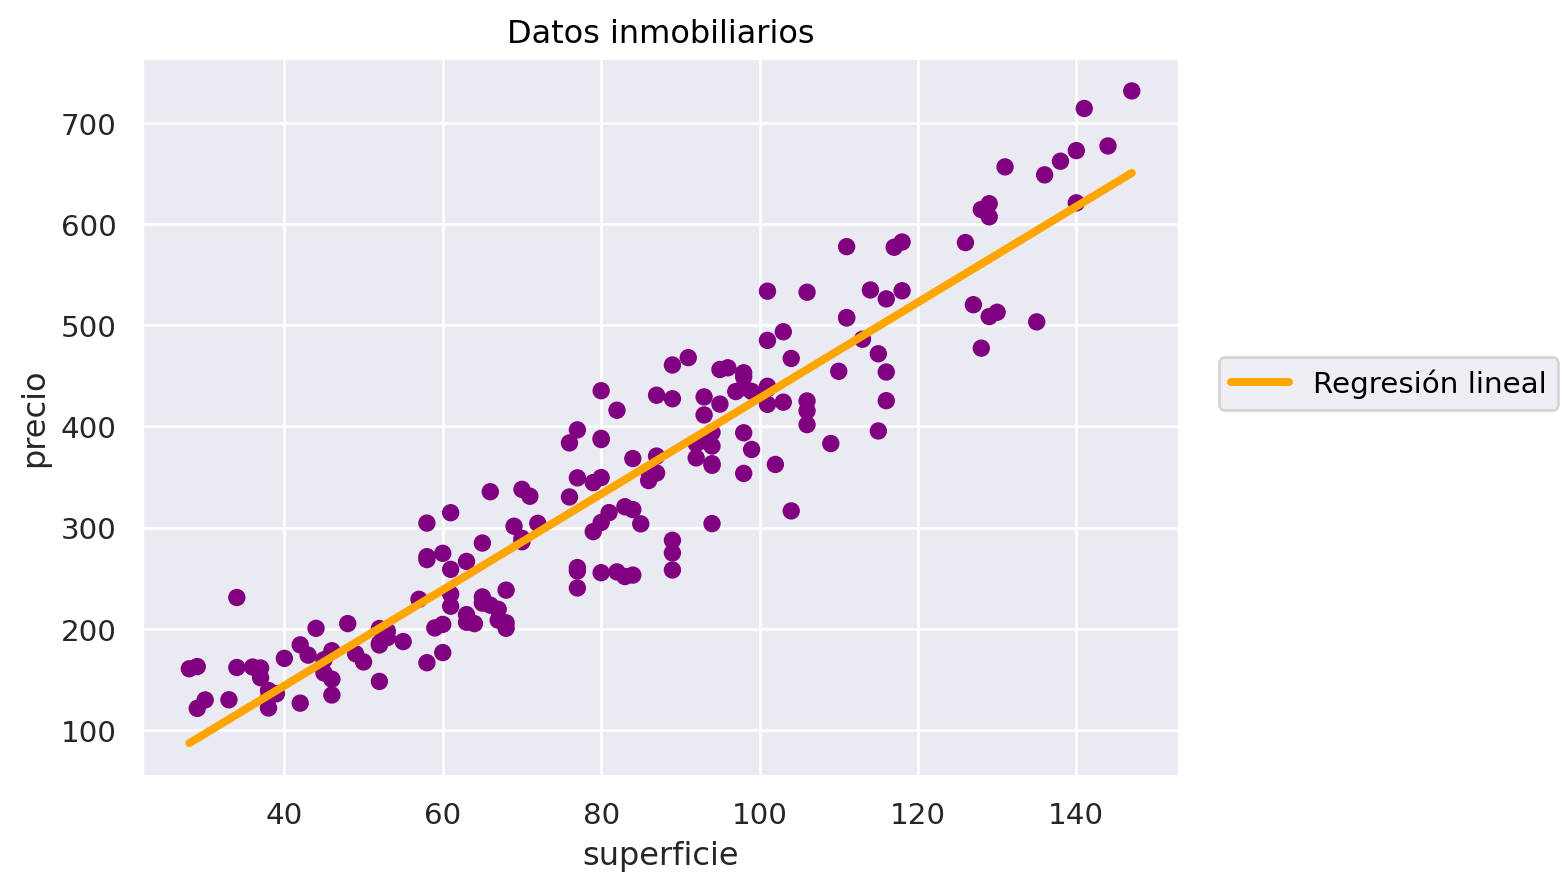

In [100]:
(
    so.Plot(datos_inmuebles, 'superficie', 'precio')
    .add(so.Dot(color='purple'))
    .add(so.Line(color='orange', linewidth=3), so.PolyFit(1), label='Regresión lineal')
    .label(
        title="Datos inmobiliarios"
    )
)

#### c)

In [109]:
# Con scikit-learn y formulaic
y, X = Formula('precio ~ superficie').get_model_matrix(datos_inmuebles)
modelo = linear_model.LinearRegression(fit_intercept=False) 
modelo.fit(X, y)
beta_0 =  modelo.coef_[0][0]
beta_1 =  modelo.coef_[0][1]

res1 = f'**Recta de ajuste**: $y = {np.round(beta_0, 3)} + {np.round(beta_1,3)}x$'
display(Markdown(res1))

**Recta de ajuste**: $y = -45.732 + 4.736x$

En este caso, la **ordenada al origen está forzada por el modelo**, los datos no pasan por ahí. Recién para inmuebles con superficie $\gtrapprox 10^2$ empezamos a obtener resultados con algún sentido: por cada metro cuadrado el precio del inmueble se incrementa en $4.736$.

#### d, e)
El **Error Cuadrático Medio** *(ECM)* mide la **magnitud del error**. Para interpretarlo correctamente le tomo **raíz cuadrada** *(RECM)*, conservando las **unidades** que heredó de $y$. El **Coeficiente de determinación** *($R^2$)* es un indicador de la **calidad** del modelo: mientras mas cerca esté de $1$, mejor será su **poder de prediccion**.

In [107]:
def ecm(x, y, pendiente, o_origen):  # x,y son Series de Panda
    y_gorrito = (x.to_numpy()*pendiente) + o_origen  # Predicciones del modelo
    residuos = y.to_numpy() - y_gorrito  # Diferencia entre cada valor real y predicho
    rss = np.sum(residuos ** 2)  # Sumatoria del cuadrado de los residuos
    ecm = rss / y.count()  # Error Cuadrático Medio
    return ecm

def r_cuadrado(x, y, pendiente, o_origen):  # x,y son Series de Panda
    y_gorrito = (x.to_numpy()*pendiente) + o_origen
    y_media = y.mean()  # Promedio de los datos observados
    ve = np.sum((y_gorrito - y_media)**2)  # Variabilidad explicada por el modelo
    vt = np.sum((y.to_numpy() - y_media)**2) # Variabilidad total (varianza muestral)
    r_cuadrado = ve / vt  # Qué tan bien se ajusta el modelo: mal-->[0,..., 1]<--bien 
    return r_cuadrado  

print(f'ECM: {ecm(datos_inmuebles.superficie, datos_inmuebles.precio, beta_1, beta_0)}')
display(Markdown(f'$R^2$: {r_cuadrado(datos_inmuebles.superficie, datos_inmuebles.precio, beta_1, beta_0)}'))

ECM: 2630.930001944696


$R^2$: 0.8762114698357918

#### f) 
**ECM** y **$R^2$** con `scikit-learn` y `formulaic`.

In [125]:
x_originales = datos_inmuebles.superficie.to_numpy()  # Extraigo los datos originales
x_a_predecir = pd.DataFrame({  
    'Intercept': np.ones(x_originales.shape),  # Le agrego una columna de unos que corresponde al intercepto
    'superficie': x_originales
})  
y_gorrito = modelo.predict(x_a_predecir)  # Aplico el modelo generado
# display(y_gorrito)  # Todo lo anterior equivale a: modelo.predict(X), con X obtenido en Formula(...)

ecm = mean_squared_error(datos_inmuebles.precio, y_gorrito)
r2 = r2_score(datos_inmuebles.precio, y_gorrito)

print(f'ECM: {ecm}')
display(Markdown(f'$R^2$: {r2}'))

ECM: 2630.930001944696


$R^2$: 0.8762114698357936

#### g)
En la zona 3 hay **mayor variabilidad** de precios.

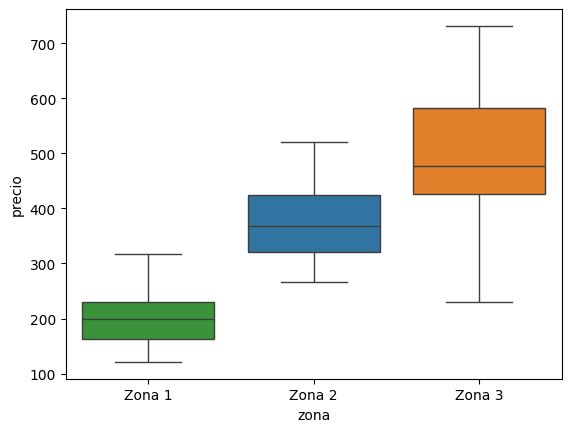

In [127]:
sns.boxplot(
    data=datos_inmuebles, 
    x='zona', 
    y='precio', 
    hue='zona', 
    order= np.sort(datos_inmuebles.zona.unique())
)
plt.show()

#### h)

In [174]:
def modelo_y_metricas_regresion_lineal(df: pd.DataFrame, x:str, y:str):
    """
    Recibe un dataframe, el nombre de la variable independiente,
    el nombre de la variable dependiente y retorna beta0, beta1, ECM, R2
    """
    # Coeficientes de la recta de ajuste
    formula_regresion = f'{y} ~ {x}'  # Notación de Wilkinson
    vector_y, matriz_X = Formula(formula_regresion).get_model_matrix(df)
    modelo = linear_model.LinearRegression(fit_intercept=False) 
    modelo.fit(matriz_X, vector_y)
    beta_0 =  modelo.coef_[0][0]
    beta_1 =  modelo.coef_[0][1]    
    # ECM y R2
    y_gorrito = modelo.predict(matriz_X)
    ecm = mean_squared_error(df[y], y_gorrito)
    r2 = r2_score(df[y], y_gorrito)
    return np.array([beta_0, beta_1, ecm, r2]) 

resultados = {}
for i in range(1,4):
    resultados[f'zona{i}'] = modelo_y_metricas_regresion_lineal(
        datos_inmuebles[datos_inmuebles['zona'] == f'Zona {i}'],
        'superficie',
        'precio'
    )

info = ''
for i in range(1,4):
    info = info + f'### **ZONA {i}** \n'
    info = info + f'\n **Recta de ajuste**: $y = {np.round(resultados[f'zona{i}'][0], 3)} + {np.round(resultados[f'zona{i}'][1],3)} x$\n'
    info = info + f'\n **ECM**: {np.round(resultados[f'zona{i}'][2], 3)} \n'
    info = info + f'\n $R^2$: {np.round(resultados[f'zona{i}'][3], 3)}\n'
    
display(Markdown(info))   

### **ZONA 1** 

 **Recta de ajuste**: $y = 58.852 + 2.442 x$

 **ECM**: 331.227 

 $R^2$: 0.856
### **ZONA 2** 

 **Recta de ajuste**: $y = 80.73 + 3.206 x$

 **ECM**: 611.496 

 $R^2$: 0.866
### **ZONA 3** 

 **Recta de ajuste**: $y = 24.966 + 4.561 x$

 **ECM**: 748.88 

 $R^2$: 0.945


#### i)
El valor del metro cuadrado en cada zona es igual al valor de la **pendiente**.

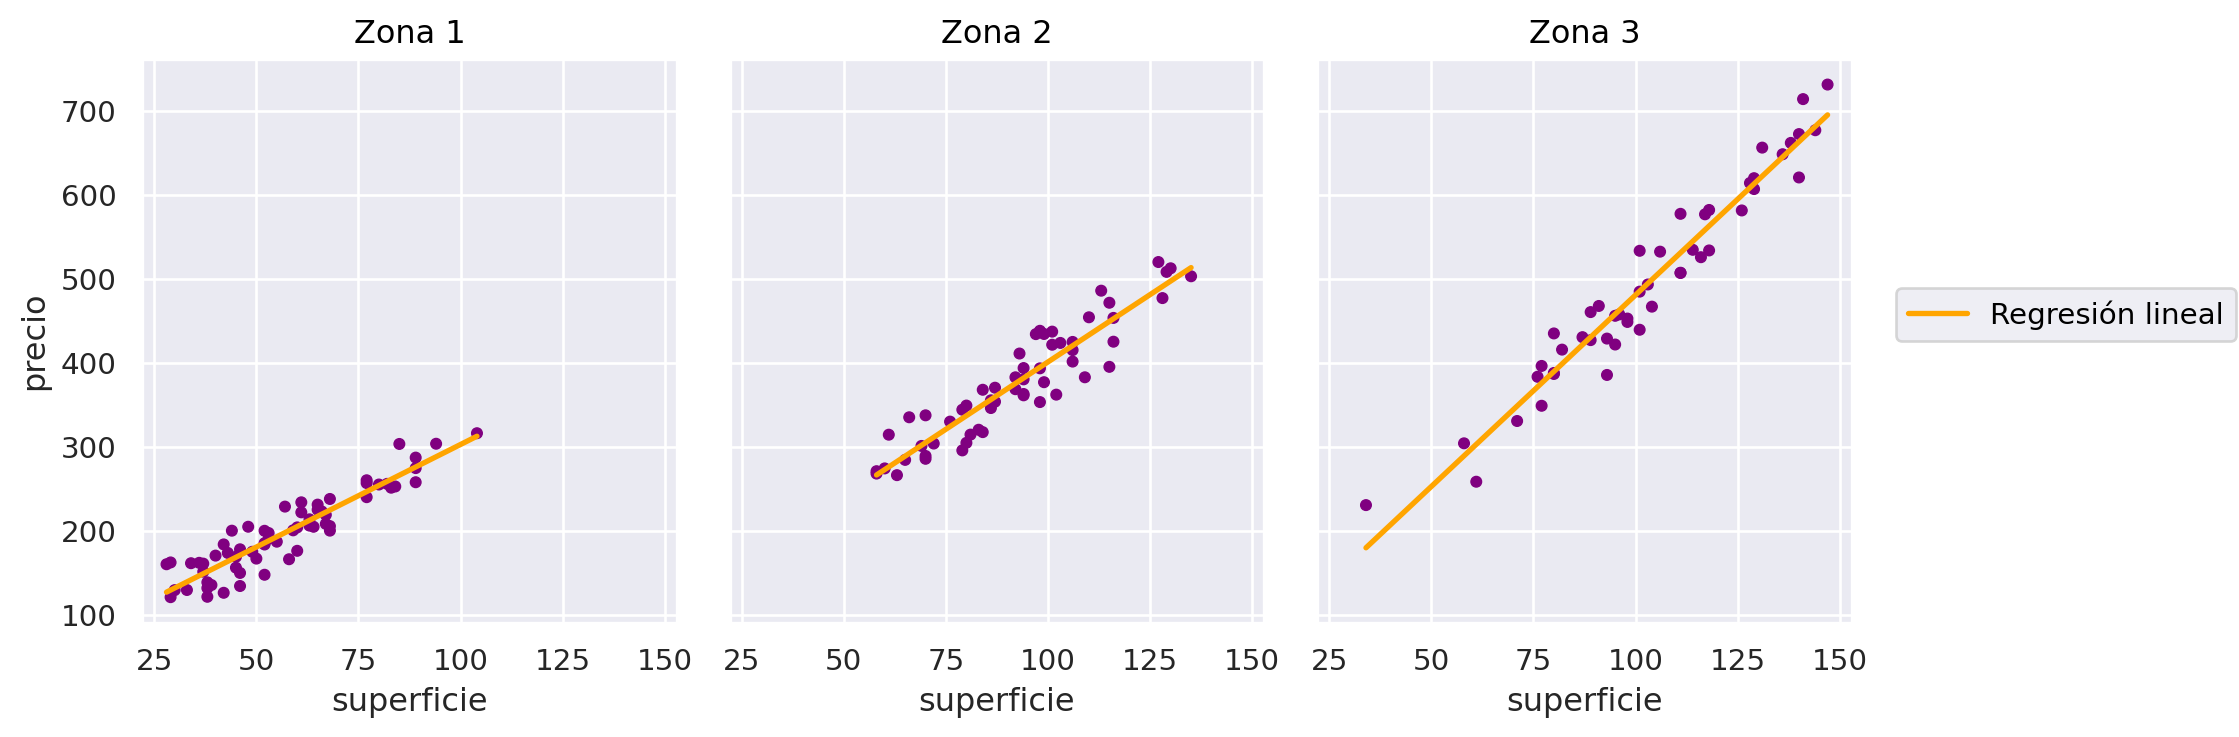

In [187]:
(
    so.Plot(data=datos_inmuebles, x='superficie', y='precio')
    .add(so.Dot(color='purple', pointsize=4))
    .add(so.Line(color='orange', linewidth=2), so.PolyFit(1), label='Regresión lineal')
    .facet('zona', order =np.sort(datos_inmuebles.zona.unique()))
    .layout(size=(10, 4))
)

#### j)

In [195]:
valor_a_predecir = np.array([105])  # Depto con 105m2 de superficie
dataframe_a_predecir = pd.DataFrame({'Intercept': np.array([1]), 'superficie': valor_a_predecir})

# Uso  el modelo creado en punto c)
precio_gral = np.round(modelo.predict(dataframe_a_predecir).item(), 3)  
# Uso directamente beta0 y beta1 obtenidos en el punto h)
precio_en_zona2 =  np.round(resultados['zona2'][0] + resultados['zona2'][1]*valor_a_predecir.item(), 3)  

display(Markdown(f'**Precio general**: {precio_gral}\n\n**Precio en zona 2**: {precio_en_zona2}'))


**Precio general**: 451.527

**Precio en zona 2**: 417.389

#### k)

In [207]:
m2_depto = 100
precio_oferta = 300
precio_ref =  np.round(resultados['zona2'][0] + resultados['zona2'][1]*m2_depto, 3)
comparacion = f'El precio de oferta es ${abs(precio_oferta - precio_ref)} más {'caro' if precio_oferta - precio_ref >= 0 else 'barato'}'
comparacion = comparacion + ' que el precio de referencia.'
print(comparacion)

El precio de oferta es $101.358 más barato que el precio de referencia.


#### l)

In [208]:
ruta_a_inmuebles_outliers = (Path(os.getcwd()) / 'recs' / 'inmuebles_outliers.csv').resolve()
datos_inmuebles_out = pd.read_csv(ruta_a_inmuebles_outliers)
datos_inmuebles_out.head()

superficie      precio    zona
0       110.0  454.425690  Zona 2
1       109.0  383.004114  Zona 2
2       101.0  437.362638  Zona 2
3        58.0  304.392486  Zona 3
4       129.0  620.027722  Zona 3

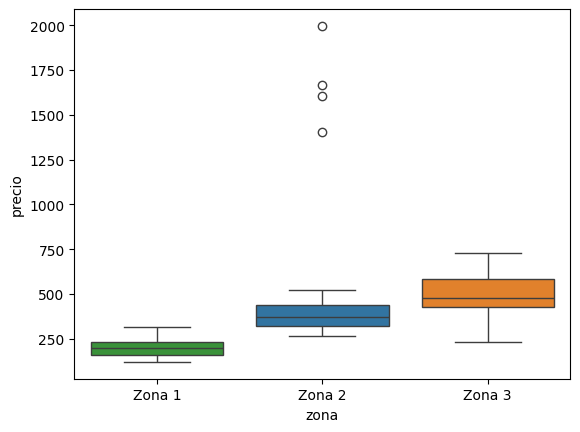

In [209]:
sns.boxplot(
    data=datos_inmuebles_out, 
    x='zona', 
    y='precio', 
    hue='zona', 
    order= np.sort(datos_inmuebles_out.zona.unique())
)
plt.show()

In [211]:
resultados_con_outliers = {}
for i in range(1,4):
    resultados_con_outliers[f'zona{i}'] = modelo_y_metricas_regresion_lineal(
        datos_inmuebles_out[datos_inmuebles_out['zona'] == f'Zona {i}'],
        'superficie',
        'precio'
    )

info_out = ''
for i in range(1,4):
    info_out = info_out + f'### **ZONA {i}** \n'
    info_out = info_out + f'\n **Recta de ajuste**: $y = {np.round(resultados_con_outliers[f'zona{i}'][0], 3)} + {np.round(resultados_con_outliers[f'zona{i}'][1],3)} x$\n'
    info_out = info_out + f'\n **ECM**: {np.round(resultados_con_outliers[f'zona{i}'][2], 3)} \n'
    info_out = info_out + f'\n $R^2$: {np.round(resultados_con_outliers[f'zona{i}'][3], 3)}\n'
    
display(Markdown(info_out))  

### **ZONA 1** 

 **Recta de ajuste**: $y = 58.852 + 2.442 x$

 **ECM**: 331.227 

 $R^2$: 0.856
### **ZONA 2** 

 **Recta de ajuste**: $y = 72.894 + 4.267 x$

 **ECM**: 109771.983 

 $R^2$: 0.06
### **ZONA 3** 

 **Recta de ajuste**: $y = 24.966 + 4.561 x$

 **ECM**: 748.88 

 $R^2$: 0.945


### Ejercicio 3
#### a)

In [250]:
datos_propinas = sns.load_dataset('tips')
datos_propinas.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [255]:
promedio_props = datos_propinas['tip'].mean()

datos_centrados = pd.DataFrame({
    'propina': datos_propinas.tip,
    'desvio_de_la_media': datos_propinas['total_bill'].to_numpy() - datos_propinas['total_bill'].mean() 
})

vector_y, matriz_X = Formula('propina ~ desvio_de_la_media').get_model_matrix(datos_centrados)
modelo = linear_model.LinearRegression(fit_intercept=False) 
modelo.fit(matriz_X, vector_y)
beta_0 =  modelo.coef_[0][0]  # Al centrar los datos resulta ser igual a la propina promedio
beta_1 =  modelo.coef_[0][1]  # Centrar la variable predictora no cambia la pendiente
display(Markdown(rf'$\beta_0$: {np.round(beta_0,3)}, $\beta_1$ {np.round(beta_1,3)}'))
print(f'Propina promedio = {promedio_props}')

$\beta_0$: 2.998, $\beta_1$ 0.105

Propina promedio = 2.99827868852459


#### b)

In [254]:
vector_y, matriz_X = Formula('tip ~ total_bill').get_model_matrix(datos_propinas)
modelo = linear_model.LinearRegression(fit_intercept=False) 
modelo.fit(matriz_X, vector_y)
beta_0 =  modelo.coef_[0][0]
beta_1 =  modelo.coef_[0][1]
display(Markdown(rf'$\beta_0$: {np.round(beta_0,3)}, $\beta_1$ {np.round(beta_1,3)}'))

$\beta_0$: 0.92, $\beta_1$ 0.105

### Ejercicio 4

In [212]:
ruta_a_bitcoin = (Path(os.getcwd()) / 'recs' / 'bitcoin.csv').resolve()
df_bitcoin = pd.read_csv(ruta_a_bitcoin)  # Cotización desde el 17/09/2014 hasta el 19/02/2022 
df_bitcoin.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

        Date         Close
0 2021-01-01  29374.152344
1 2021-01-02  32127.267578
2 2021-01-03  32782.023438
3 2021-01-04  31971.914063
4 2021-01-05  33992.429688


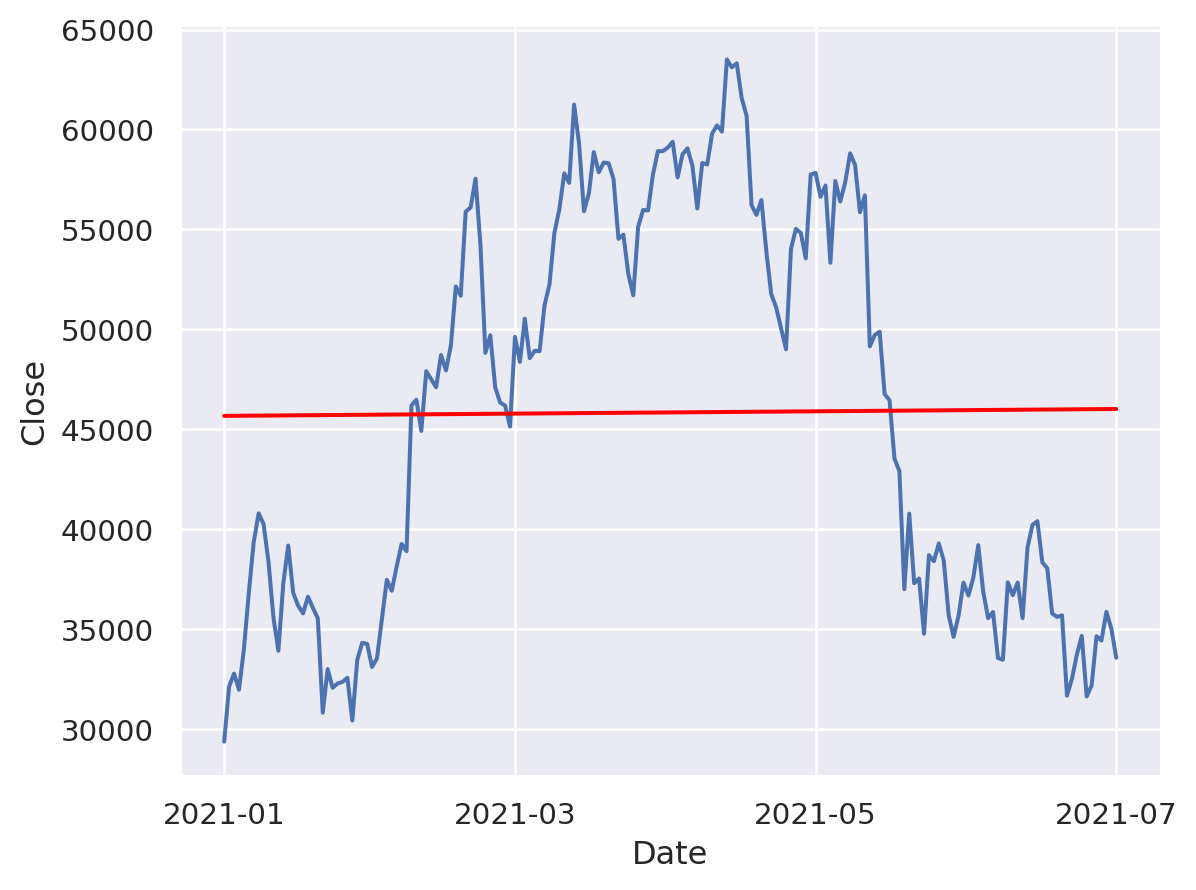

In [213]:
btc_2021 = df_bitcoin.loc[  # Recomandado para seleccionar filas y columnas por etiquetas o condiciones booleanas
    (df_bitcoin['Date'] >= "2021-01-01") &  (df_bitcoin['Date'] <= "2021-07-01"),  # Rango de fechas seleccionadas 
    ['Date', 'Close']  # El dataframe solo conserva estas columnas
].reset_index(drop=True)  # Reinicio el valor de los indices
btc_2021['Date'] = pd.to_datetime(btc_2021['Date']) # Convierte de object a datetime
#  print(btc_2021['Date'].dtype)  # Para verificar el tipo de dato de la columna 'Date'
print(btc_2021.head())

(
    so.Plot(btc_2021,'Date','Close')
    .add(so.Line())
    .add(so.Line(color='red'), so.PolyFit(1))  # La regresión lineal resulta insuficiente
)

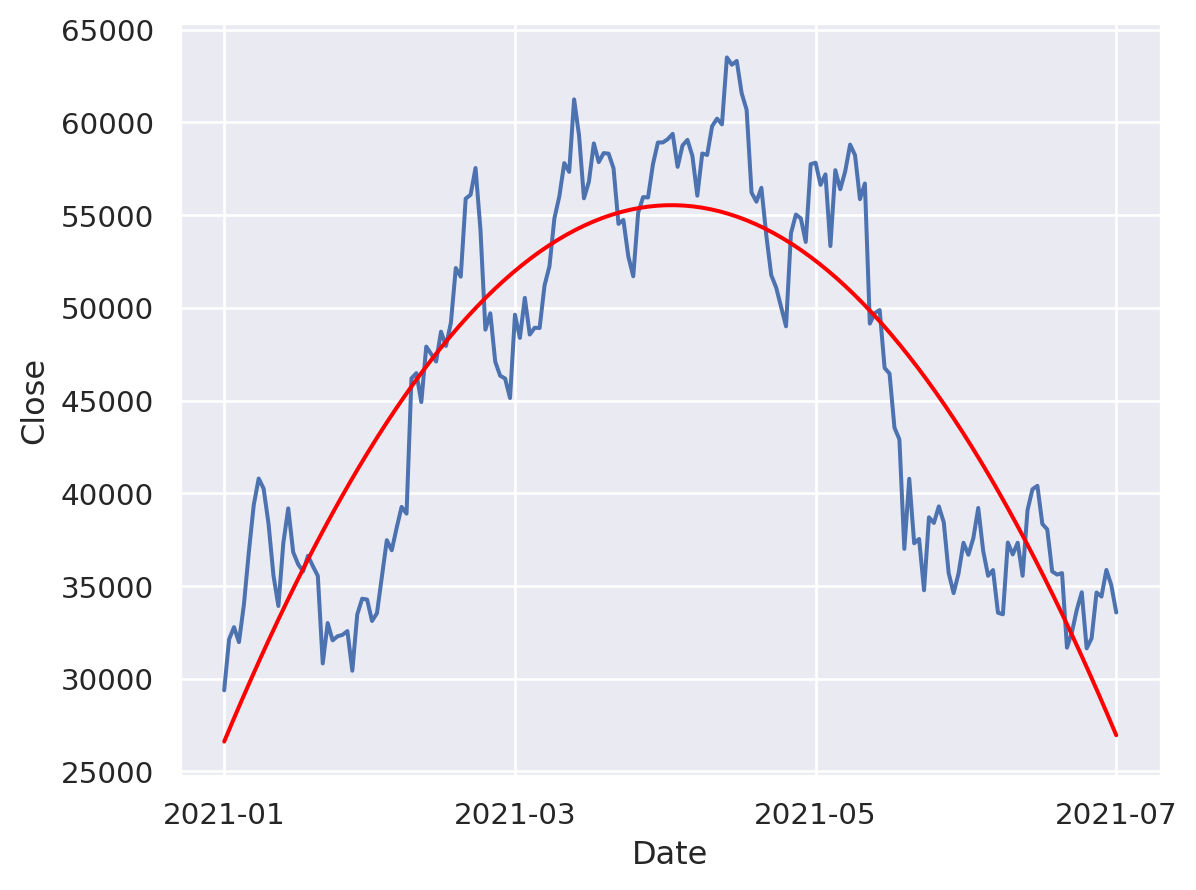

In [214]:
(
    so.Plot(btc_2021,'Date','Close')
    .add(so.Line())
    .add(so.Line(color='red'), so.PolyFit(2))  # Regresión con polinomio de grado 2
)

### Ejercicio 5
#### a)

In [215]:
datos_salud = sns.load_dataset('healthexp')
datos_salud.head()

Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9

In [216]:
# Obtengo los datos de Japón, me quedo solo con las columnas indicadas y reinicio los índices
datos_salud_jpn = datos_salud.loc[datos_salud.Country == 'Japan', ['Spending_USD', 'Life_Expectancy']].reset_index(drop=True)
datos_salud_jpn.head()

Spending_USD  Life_Expectancy
0       150.437             72.0
1       163.854             72.9
2       185.390             73.2
3       205.778             73.4
4       242.018             73.7

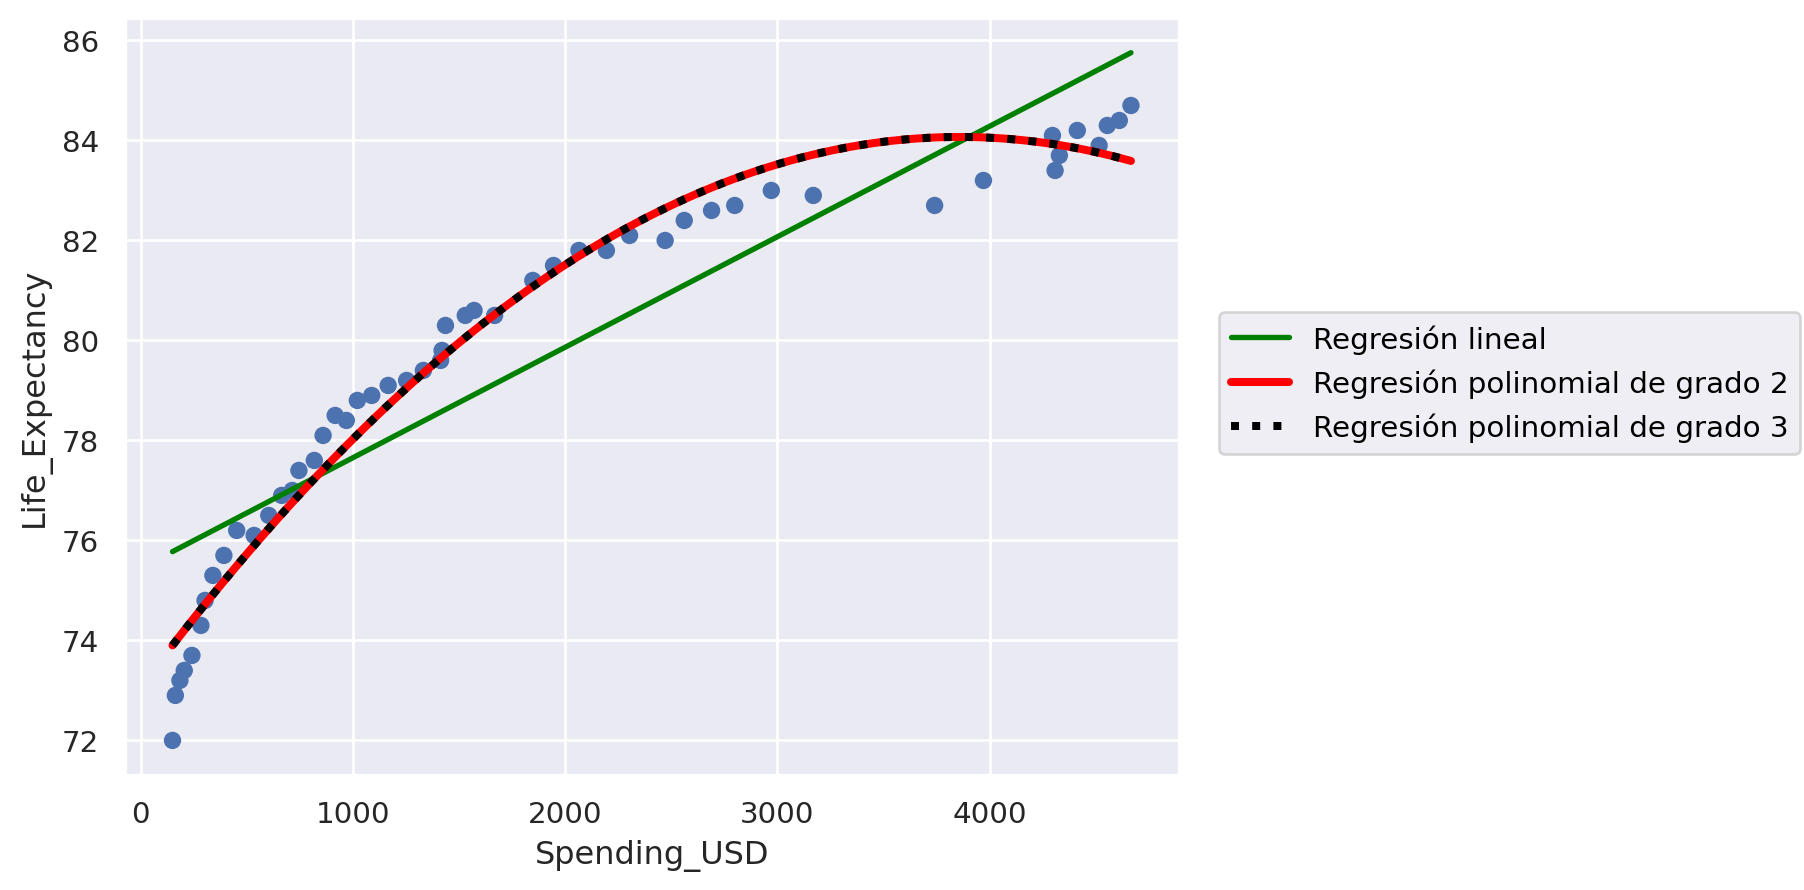

In [217]:
(
    so.Plot(datos_salud_jpn, 'Spending_USD', 'Life_Expectancy')
    .add(so.Dot())
    .add(so.Line(color='green', linewidth=2), so.PolyFit(1), label='Regresión lineal')
    .add(so.Line(color='red', linewidth=3), so.PolyFit(2), label='Regresión polinomial de grado 2')
    .add(so.Line(color='black', linewidth=3, linestyle=':'), so.PolyFit(), label='Regresión polinomial de grado 3')
)

#### b)

In [218]:
# # Dos maneras de generar lo mismo: con o sin intercept:
# y, X = Formula('Life_Expectancy ~ poly(Spending_USD, 3, raw=True)-1').get_model_matrix(datos_salud_jpn)
# modelo = linear_model.LinearRegression(fit_intercept=True)  # X no tiene columna 'Intercept'
# modelo.fit(X, y)
# intercepto = modelo.intercept_[0]
# coeficientes = modelo.coef_[0][:]
# beta = np.array([intercepto, *coeficientes])
# ...

# Modelo
y, X = Formula('Life_Expectancy ~ poly(Spending_USD, 3, raw=True)').get_model_matrix(datos_salud_jpn)
modelo = linear_model.LinearRegression(fit_intercept=False)  # X tiene una columna 'Intercept' con todos sus valores iguales a 1.0
modelo.fit(X, y)
# Intercepto y coeficientes
intercepto = modelo.coef_[0][0]
coeficientes = modelo.coef_[0][1:]
beta = np.array([intercepto, *coeficientes])
# Valores
display(Markdown(rf'$\beta_0$: {np.round(beta[0],3)}'))
display(Markdown(rf'$\beta_1$: {beta[1]}'))
display(Markdown(rf'$\beta_2$: {beta[2]}'))
display(Markdown(rf'$\beta_3$: {beta[3]}'))

$\beta_0$: 71.844

$\beta_1$: 0.009097662205084109

$\beta_2$: -2.684173320369204e-06

$\beta_3$: 2.8216848475201683e-10

#### c)

In [219]:
# Error Cuadrático Medio y Coeficiente de determinación
predicciones_de_y = modelo.predict(X)
ecm = mean_squared_error(datos_salud_jpn.Life_Expectancy, predicciones_de_y)
r2 = r2_score(datos_salud_jpn.Life_Expectancy, predicciones_de_y)
display(Markdown(f'**ECM**: {ecm} \n\n $R^2$: {r2}'))

**ECM**: 0.10758286138707461 

 $R^2$: 0.9912790933475435

#### d)

In [220]:
# Predicción haciendo las cuentas
val_a_predecir = 5000
prediccion1 = beta[0] + beta[1]*val_a_predecir + beta[2]*val_a_predecir**2 + beta[3]*val_a_predecir**3
print(f'Si Japón invirtiera U$D{val_a_predecir}, la expectativa de vida sus habitantes sería de {np.round(prediccion1,2).item()} años.')

Si Japón invirtiera U$D5000, la expectativa de vida sus habitantes sería de 85.5 años.


In [221]:
# Prediccion como producto matricial
prediccion2 = beta @ val_a_predecir**np.arange(4, dtype='int64')
print(f'Si Japón invirtiera U$D{val_a_predecir}, la expectativa de vida sus habitantes sería de {np.round(prediccion2,2).item()} años.')

Si Japón invirtiera U$D5000, la expectativa de vida sus habitantes sería de 85.5 años.


#### e)
A medida que aumenta el grado del polinomo, el modelo tiende a ajustarse cada vez más a los valores exactos de entrenamiento. Este **sobreajuste** disminuye significativamente la eficacia y **capacidad de generalización** o predicción del modelo sobre nuevos datos.

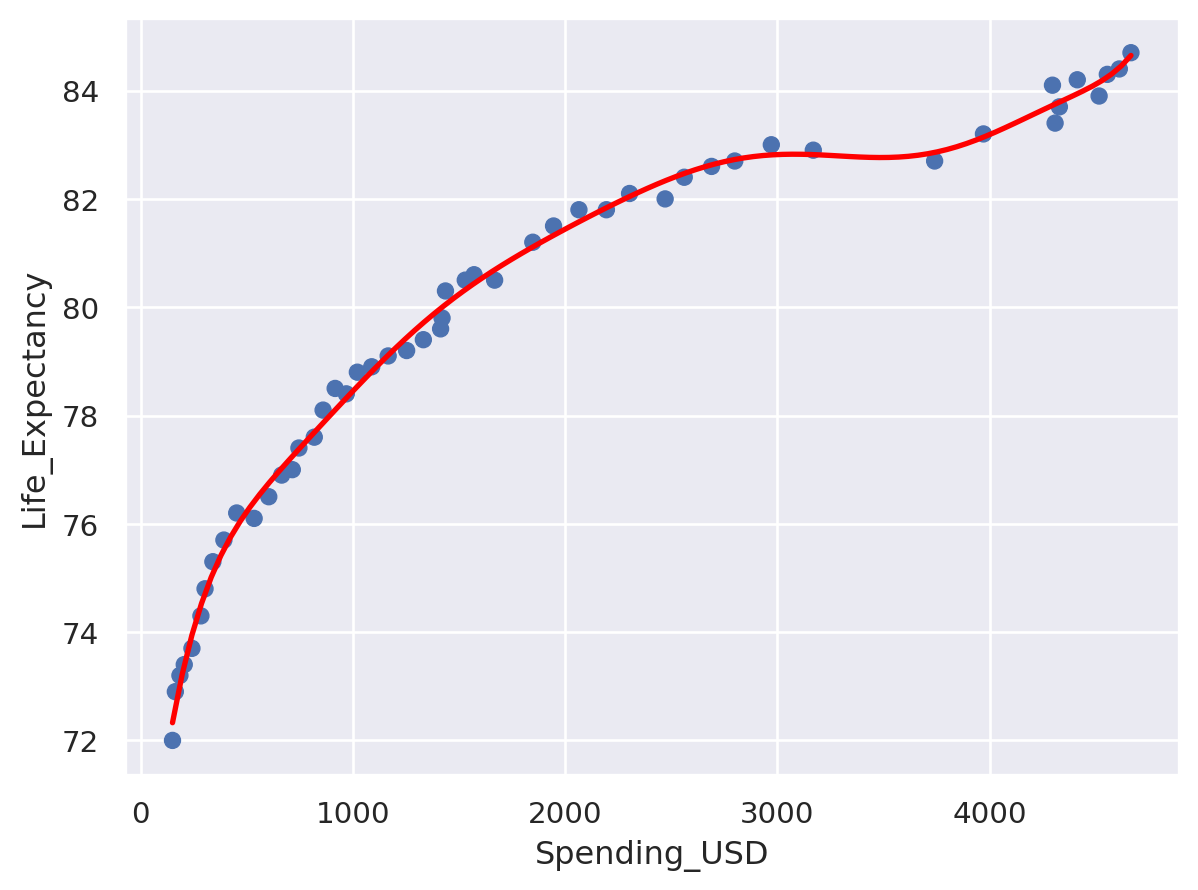

In [222]:
(
    so.Plot(datos_salud_jpn, 'Spending_USD', 'Life_Expectancy')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=2), so.PolyFit(10))
)

### Ejercicio 6: Media Móvil de Cudrados Mínimos *(LSMA)*

In [223]:
def lsma(x: pd.Series | np.ndarray, y: pd.Series | np.ndarray, k: int):    
    if k < 2:  # El período de tiempo (ventana)
        raise ValueError('k debe ser mayor o igual a 2')
        
    # Si la variable predictor es de tipo fecha
    if np.issubdtype(x.dtype, np.datetime64):
        x_min = x.min()
        if isinstance(x, pd.Series):
            x = (x - x_min).dt.days
        else:  # numpy array
            x = (x - x_min) / np.timedelta64(1, 'D')
        
    # Resuelvo el tipo de los datos 
    vec_x = x.to_numpy() if isinstance(x, pd.Series) else np.asarray(x)
    vec_y = y.to_numpy() if isinstance(y, pd.Series) else np.asarray(y)
    
    x_aprox = np.array([i for i in range(k, len(vec_x))]) # Los valores para los cuales se calculan los puntos de la curva de LSMA
    y_aprox = [] # Las coordenadas 'y' de los puntos de la curva
    for i in x_aprox:
        beta_0, beta_1 = coeficientes_regresion_lineal(vec_x[i-k: i], vec_y[i-k:i])
        y_aprox.append(beta_0 + beta_1*vec_x[i])

    return x_aprox, y_aprox          

In [224]:
df_bitcoin.head()  # Cotización desde el 17/09/2014 hasta el 19/02/2022 

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

In [225]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'], format='%Y-%m-%d')
periodo_btc = df_bitcoin.loc[
    (df_bitcoin['Date'] >= "2021-01-01") &  (df_bitcoin['Date'] <= "2021-07-01"),
    ['Date', 'Close']
].reset_index(drop=True).reset_index(names='Day')

# El mínimo (la tendencia a corto plazo) indica el umbral de ruido (semanal, quincenal, mensual, etc.) que se está dispuesto a ignorar
x_lsma_9, y_lsma_9 = lsma(periodo_btc.Date, periodo_btc.Close, 9) 
x_lsma_24, y_lsma_24 = lsma(periodo_btc.Date, periodo_btc.Close, 24)

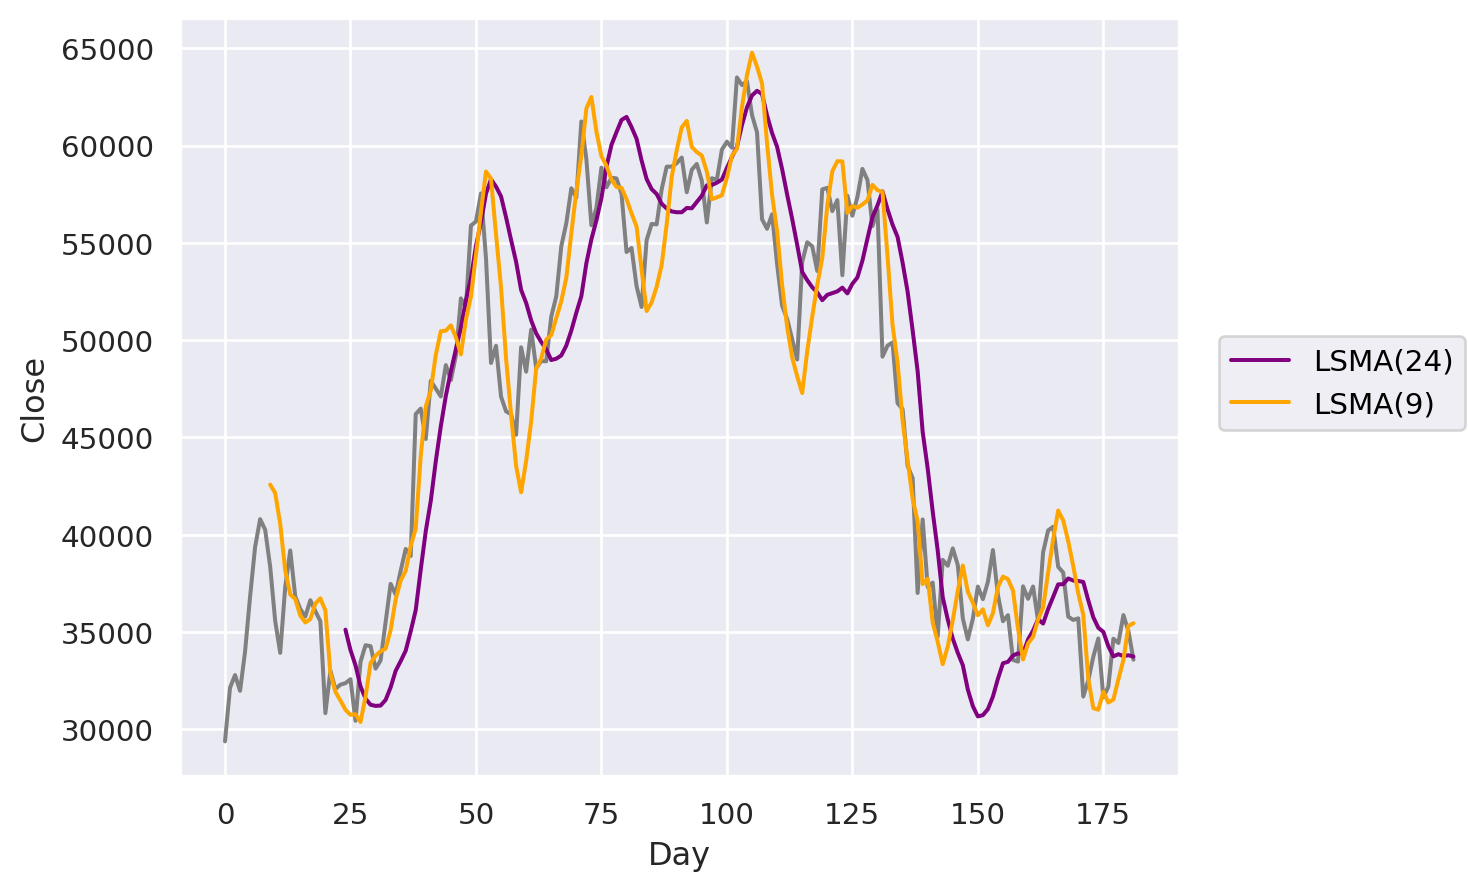

In [226]:
(
    so.Plot()
    .add(so.Line(color='grey'), x=periodo_btc.Day, y=periodo_btc.Close)
    .add(so.Line(color='purple'), x=x_lsma_24, y=y_lsma_24, label='LSMA(24)')
    .add(so.Line(color='orange'), x=x_lsma_9, y=y_lsma_9, label='LSMA(9)')
)

## **EJERCICIOS GUÍA 5**: *operaciones con DataFrames*

In [36]:
pings = sns.load_dataset('penguins') 
display(pings)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

### Ejercicio 1
A partir del dataset penguins, crear un subconjunto de datos que contenga sólo pingüinos de la isla Biscoe y que tengan un pico de 48 mm de largo o más.

In [42]:
pings_biscoe_p48mm = pings[(pings.island == 'Biscoe') & (pings.flipper_length_mm >= 48.0)]
display(pings_biscoe_p48mm)

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
20   Adelie  Biscoe            37.8           18.3              174.0   
21   Adelie  Biscoe            37.7           18.7              180.0   
22   Adelie  Biscoe            35.9           19.2              189.0   
23   Adelie  Biscoe            38.2           18.1              185.0   
24   Adelie  Biscoe            38.8           17.2              180.0   
..      ...     ...             ...            ...                ...   
338  Gentoo  Biscoe            47.2           13.7              214.0   
340  Gentoo  Biscoe            46.8           14.3              215.0   
341  Gentoo  Biscoe            50.4           15.7              222.0   
342  Gentoo  Biscoe            45.2           14.8              212.0   
343  Gentoo  Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
20        3400.0  Female  
21        3600.0    Male  
22        3800.0  Female  
23        3950.0    Male  
24        3800.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[167 rows x 7 columns]

### Ejercicio 2 
Crear otro dataset con la información de pingüinos Adelie machos que no sean de isla Biscoe.

In [5]:
pings_m_adelie_no_biscoe = pings[(pings.sex == 'Male') & (pings.island != 'Biscoe')]
display(pings_m_adelie_no_biscoe)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
7       Adelie  Torgersen            39.2           19.6              195.0   
13      Adelie  Torgersen            38.6           21.2              191.0   
14      Adelie  Torgersen            34.6           21.1              198.0   
..         ...        ...             ...            ...                ...   
210  Chinstrap      Dream            50.2           18.8              202.0   
212  Chinstrap      Dream            51.9           19.5              206.0   
215  Chinstrap      Dream            55.8           19.8              207.0   
217  Chinstrap      Dream            49.6           18.2              193.0   
218  Chinstrap      Dream            50.8           19.0              210.0   

     body_mass_g   sex  
0         3750.0  Male  
5         3650.0  Male  
7         4675.0  Male  
13        3800.0  Male  
14        4400.0  Male  
..           ...   ...  
210       3800.0  Male  
212       3950.0  Male  
215       4000.0  Male  
217       3775.0  Male  
218       4100.0  Male  

[85 rows x 7 columns]

### Ejercicio 3
Del dataset penguins quedarse con todas las variables excepto year, sex y body_mass_g.

In [14]:
pings_subconj = pings.drop(['sex', 'body_mass_g'], axis=1)
display(pings_subconj)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm
0    Adelie  Torgersen            39.1           18.7              181.0
1    Adelie  Torgersen            39.5           17.4              186.0
2    Adelie  Torgersen            40.3           18.0              195.0
3    Adelie  Torgersen             NaN            NaN                NaN
4    Adelie  Torgersen            36.7           19.3              193.0
..      ...        ...             ...            ...                ...
339  Gentoo     Biscoe             NaN            NaN                NaN
340  Gentoo     Biscoe            46.8           14.3              215.0
341  Gentoo     Biscoe            50.4           15.7              222.0
342  Gentoo     Biscoe            45.2           14.8              212.0
343  Gentoo     Biscoe            49.9           16.1              213.0

[344 rows x 5 columns]

### Ejercicio 4

In [45]:
pings_filtrados = (
    pings[pings.island != 'Biscoe']
    .loc[:, 'species':'body_mass_g']  # Sólo se quede con las variables que están entre species y body_mass_g inclusive.
    .rename(columns = {'species':'especie_pingüino'})
    .groupby('especie_pingüino')
    .agg({col : 'mean' for col in pings.columns if 'length' in col})  # agg() aplica operaciones sobre columnas (o varias sobre la misma, si es una serie)
    .rename(columns = {col : f'{col}_mean' for col in pings.columns if 'length' in col})
)
display(pings_filtrados)

bill_length_mm_mean  flipper_length_mm_mean
especie_pingüino                                             
Adelie                      38.715888              190.429907
Chinstrap                   48.833824              195.823529

### Ejercicio 5

In [65]:
pings_renombrado = (
    pings.rename(columns = {'species':'especie'})
    .rename(columns = {'flipper_length_mm':'aleta_mm', 'body_mass_g':'pego_g'})
    .rename(columns = str.upper)
    # .rename(index = {0:'cero'})
    .rename(columns = str.lower)
    .rename(index = np.sqrt)
    .rename(index = lambda indice: indice + 1)
    .rename(index = lambda indice: indice * 2)
    .rename(columns = lambda col: str.upper(col))
)
display(pings_renombrado.head())

ESPECIE     ISLAND  BILL_LENGTH_MM  BILL_DEPTH_MM  ALETA_MM  PEGO_G  \
2.000000  Adelie  Torgersen            39.1           18.7     181.0  3750.0   
4.000000  Adelie  Torgersen            39.5           17.4     186.0  3800.0   
4.828427  Adelie  Torgersen            40.3           18.0     195.0  3250.0   
5.464102  Adelie  Torgersen             NaN            NaN       NaN     NaN   
6.000000  Adelie  Torgersen            36.7           19.3     193.0  3450.0   

             SEX  
2.000000    Male  
4.000000  Female  
4.828427  Female  
5.464102     NaN  
6.000000  Female

### Ejercicio 6

In [136]:
ruta_a_macro = (Path(os.getcwd()) / 'recs' / 'macro_full_columns.csv').resolve()
macro = pd.read_csv(ruta_a_macro)
display(macro)

Unnamed: 0  Anio  FBKF.Construcciones.Priv_Publ  \
0            1  1950                    20353627362   
1            2  1951                    21739314091   
2            3  1952                    19685428171   
3            4  1953                    20237375978   
4            5  1954                    19372130307   
..         ...   ...                            ...   
61          62  2011                    66813943052   
62          63  2012                    64700327691   
63          64  2013                    64634666531   
64          65  2014                    63301703123   
65          66  2015                    64462175043   

    FBKF.Equi_Dur_Prod.Mat_Transp.Nac  FBKF.Equi_Dur_Prod.Mat_Transp.Import  \
0                        6.685869e+08                          5.844002e+08   
1                        8.427402e+08                          2.532758e+09   
2                        1.119084e+09                          1.484422e+09   
3                        1.207891e+09                          1.459989e+09   
4                        1.173452e+09                          8.059002e+08   
..                                ...                                   ...   
61                       1.189902e+10                          7.661349e+09   
62                       1.193748e+10                          5.518154e+09   
63                       1.378317e+10                          7.239125e+09   
64                       1.030574e+10                          5.950583e+09   
65                       1.143976e+10                          5.599293e+09   

    FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac  FBKF.Equi_Dur_Prod.Maqui_YEqui.Import  \
0                           3119383475                           8.631124e+08   
1                           3562534310                           1.292775e+09   
2                           3440750327                           1.088416e+09   
3                           3621895632                           8.869267e+08   
4                           4121320340                           7.830799e+08   
..                                 ...                                    ...   
61                         23759578339                           4.132673e+10   
62                         21650676546                           3.568329e+10   
63                         24156151830                           3.373643e+10   
64                         21378949359                           3.253840e+10   
65                         24228907045                           3.441289e+10   

    Consumo.Hogares  Consumo.Gobierno  Exportaciones  ...  \
0      1.046560e+11       21706316451   1.072959e+10  ...   
1      1.105380e+11       21767097618   8.455494e+09  ...   
2      1.051080e+11       21455589059   6.224082e+09  ...   
3      1.064030e+11       20742065172   9.619869e+09  ...   
4      1.143920e+11       21238933697   1.020162e+10  ...   
..              ...               ...            ...  ...   
61     5.014680e+11       80184420870   1.598420e+11  ...   
62     4.998770e+11       82549920556   1.531870e+11  ...   
63     5.165960e+11       86152836238   1.464500e+11  ...   
64     4.967300e+11       89033326375   1.367560e+11  ...   
65     5.098710e+11       94456349868   1.355150e+11  ...   

    PBI_a_precios_de_mercado.oferta  Vol_PIB_perCap  \
0                      1.420980e+11     8230.718755   
1                      1.474360e+11     8360.967138   
2                      1.404910e+11     7806.866125   
3                      1.473240e+11     8027.665603   
4                      1.533160e+11     8196.878491   
..                              ...             ...   
61                     7.118760e+11    17252.803350   
62                     7.064210e+11    16927.042940   
63                     7.220400e+11    17108.767060   
64                     7.056120e+11    16536.677200   
65                     7.225620e+11    16752.344150   

    Vol_Consumo_Hogares_Per

In [126]:
# a) Datos faltantes

# axis=0 por defecto
# print(macro.isna().sum(axis = 1), '\n')  # Retorna el total de Nan que hay en cada fila
# print(macro.isna().any(axis = 1))  # Retorna un booleano que indica si en la fila hay algun Nan
# print(macro.isna().sum(axis = 0), '\n')  # Retorna el total de Nan que hay en cada columna
# print(macro.isna().any(axis = 0))  # Retorna un booleano que indica si en la columna hay algun Nan
columnas_con_NaN = macro.columns[macro.isna().any()].tolist()
print(columnas_con_NaN)

['EXPO_OTAGRIC_2004', 'EXPO_PESCA_2004', 'EXPO_ALIMENT_2004', 'EXPO_TEXTIL_2004', 'EXPO_CUEROIND_2004', 'EXPO_PAPEL_2004', 'EXPO_CAUCHO_2004', 'EXPO_QUIMICO_2004', 'EXPO_COMBIUST_2004', 'EXPO_HIERRO_2004', 'EXPO_METNOFERR_2004', 'EXPO_MAQUIN_2004', 'EXPO_RESTOIND_2004', 'PIB_perCap__variPorc', 'Vol_Cons_Hogares_per_Cap__vari_Porc', 'Vol_FBKF_perCap__variPorc', 'IPI__variPorc']


In [132]:
# b) Años con datos faltantes

anios = macro.Anio[macro.isna().any(axis=1)].tolist()
print(anios)

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965]


In [134]:
# c) Convertir los datos faltantes a cero

macro_sin_NaN = macro.fillna(0)
macro_sin_NaN.isna().sum()


Unnamed: 0                              0
Anio                                    0
FBKF.Construcciones.Priv_Publ           0
FBKF.Equi_Dur_Prod.Mat_Transp.Nac       0
FBKF.Equi_Dur_Prod.Mat_Transp.Import    0
                                       ..
Vol_Cons_Hogares_per_Cap__vari_Porc     0
Vol_FBKF_perCap__variPorc               0
Vol_PIB_encaden_Fisher_2004             0
IPI_volumen                             0
IPI__variPorc                           0
Length: 85, dtype: int64

### Ejercicio 7

In [169]:
pings = sns.load_dataset('penguins') 
pings_sin_NaN = pings.dropna().reset_index(drop=True)  # Desecho los NaN y reinicio los índices
display(pings_sin_NaN)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen            36.7           19.3              193.0   
4    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
328  Gentoo     Biscoe            47.2           13.7              214.0   
329  Gentoo     Biscoe            46.8           14.3              215.0   
330  Gentoo     Biscoe            50.4           15.7              222.0   
331  Gentoo     Biscoe            45.2           14.8              212.0   
332  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3         3450.0  Female  
4         3650.0    Male  
..           ...     ...  
328       4925.0  Female  
329       4850.0  Female  
330       5750.0    Male  
331       5200.0  Female  
332       5400.0    Male  

[333 rows x 7 columns]

### Ejercicio 8

In [157]:
pings.columns = [str.upper(c) for c in pings.columns]  # Opera en sitio
display(pings.head())

SPECIES     ISLAND  BILL_LENGTH_MM  BILL_DEPTH_MM  FLIPPER_LENGTH_MM  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   BODY_MASS_G     SEX  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

### Ejercicio 9

In [162]:
pings = pings.rename(columns=str.lower)
pings.columns = [str.upper(c) if c.startswith('bill') else c for c in pings.columns]
display(pings.head())

species     island  BILL_LENGTH_MM  BILL_DEPTH_MM  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

### Ejercicio 10
Utilizando una función lambda, agregar una nueva columna a la base de datos llamada peso_bin
que contenga:
- “chico” si la masa corporal es menos que 4000 gramos.
- “grande” si la masa corporal es mayor que 4000 gramos.

In [166]:
pings = pings.rename(columns=str.lower)
pings['peso_bin'] = ['chico' if peso < 4000.0 else 'grande' for peso in pings.body_mass_g]

display(pings.head())

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex peso_bin  
0       3750.0    Male    chico  
1       3800.0  Female    chico  
2       3250.0  Female    chico  
3          NaN     NaN   grande  
4       3450.0  Female    chico

### Ejercicio 11
Crear un subconjunto de los datos de `penguins` sólo con las obsevaciones de pingüinos machos con aletas *(flipper)* de más de 200 mm de largo y quedarse con todas las columnas que terminan con *_mm*.

In [172]:
pings = sns.load_dataset('penguins') 
pings_subconj = (  # Las filas que cumplen la condición,                  las columnas que me interesan
    pings.loc[(pings.sex == 'Male') & (pings.flipper_length_mm > 200.0), [c for c in pings.columns if c.endswith('_mm')]]
)
display(pings_subconj.head())

bill_length_mm  bill_depth_mm  flipper_length_mm
91             41.1           18.1              205.0
95             40.8           18.9              208.0
101            41.0           20.0              203.0
123            41.4           18.5              202.0
129            44.1           18.0              210.0

### Ejercicio 12

In [179]:
pings = sns.load_dataset('penguins')
pings_subconj = (
    pings.loc[pings.island == 'Dream', ['species'] + [c for c in pings.columns if c.startswith('bill')]]
)
display(pings_subconj.head())

species  bill_length_mm  bill_depth_mm
30  Adelie            39.5           16.7
31  Adelie            37.2           18.1
32  Adelie            39.5           17.8
33  Adelie            40.9           18.9
34  Adelie            36.4           17.0

### Ejercicio 13

In [190]:
pings = sns.load_dataset('penguins')
pings_peso = pings.copy()
pings_peso['peso'] = [peso/1000 for peso in pings.body_mass_g]
pings_peso['island'] = pings.island.str.lower()
display(pings_peso.head())

# Lo mismo pero en una operación usando assign
pings = sns.load_dataset('penguins')
pings_peso = pings.assign(
    peso = [peso/1000 for peso in pings.body_mass_g],
    island = pings.island.str.lower(),
)
display(pings_peso.head())

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  torgersen            39.1           18.7              181.0   
1  Adelie  torgersen            39.5           17.4              186.0   
2  Adelie  torgersen            40.3           18.0              195.0   
3  Adelie  torgersen             NaN            NaN                NaN   
4  Adelie  torgersen            36.7           19.3              193.0   

   body_mass_g     sex  peso  
0       3750.0    Male  3.75  
1       3800.0  Female  3.80  
2       3250.0  Female  3.25  
3          NaN     NaN   NaN  
4       3450.0  Female  3.45

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  torgersen            39.1           18.7              181.0   
1  Adelie  torgersen            39.5           17.4              186.0   
2  Adelie  torgersen            40.3           18.0              195.0   
3  Adelie  torgersen             NaN            NaN                NaN   
4  Adelie  torgersen            36.7           19.3              193.0   

   body_mass_g     sex  peso  
0       3750.0    Male  3.75  
1       3800.0  Female  3.80  
2       3250.0  Female  3.25  
3          NaN     NaN   NaN  
4       3450.0  Female  3.45

### Ejercicio 14
Agregar una columna a `penguins` con la mediana de la masa corporal de los pingüinos de cada especie usando `group_by()` y `agg()`.

In [211]:
pings = sns.load_dataset('penguins') 
pings['mediana_peso'] = [ 
    pings.groupby('species').agg({'body_mass_g':'median'}).to_dict()['body_mass_g'][esp] 
    for esp in pings.species 
]
display(pings.head())

# Lo mismo pero más simple
medianas = pings.groupby('species')['body_mass_g'].median().to_dict()
pings['mediana_peso'] = [medianas[esp] for esp in pings['species']]
display(pings.head())

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  mediana_peso  
0       3750.0    Male        3700.0  
1       3800.0  Female        3700.0  
2       3250.0  Female        3700.0  
3          NaN     NaN        3700.0  
4       3450.0  Female        3700.0

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  mediana_peso  
0       3750.0    Male        3700.0  
1       3800.0  Female        3700.0  
2       3250.0  Female        3700.0  
3          NaN     NaN        3700.0  
4       3450.0  Female        3700.0

### Ejercicio 15

In [214]:
pings = sns.load_dataset('penguins') 
pings_subconj = (
    pings.loc[pings.island != 'Biscoe', 'species':'body_mass_g']
    .rename(columns={'species':'especie_pinguino'})
    .groupby('especie_pinguino')
    .agg({col : 'mean' for col in pings.columns if 'length' in col}) 
    .rename(columns = {col : f'{col}_mean' for col in pings.columns if 'length' in col})
)
display(pings_subconj)

bill_length_mm_mean  flipper_length_mm_mean
especie_pinguino                                             
Adelie                      38.715888              190.429907
Chinstrap                   48.833824              195.823529

### Ejercicio 16

In [226]:
ruta_a_macro = (Path(os.getcwd()) / 'recs' / 'macro_full_columns.csv').resolve()

macro = pd.read_csv(ruta_a_macro)
macro = (
    macro.set_index('Anio')
    .drop('Unnamed: 0', axis=1)
    .rename(columns = {c: f'{c[:-8]}vari_Porc' if c.endswith('variPorc') else c for c in macro.columns})
    .rename(columns = {c: f'{c[:-6]}per_Cap' if c.endswith('PerCap') else c for c in macro.columns})
    .rename(columns = {c: f'{c[:-6]}per_Cap' if c.endswith('perCap') else c for c in macro.columns})
    .rename(columns = {c: f'{c[:-7]}per_Cap' if c.endswith('Per_Cap') else c for c in macro.columns})
)
display(macro.head())

FBKF.Construcciones.Priv_Publ  FBKF.Equi_Dur_Prod.Mat_Transp.Nac  \
Anio                                                                     
1950                    20353627362                       6.685869e+08   
1951                    21739314091                       8.427402e+08   
1952                    19685428171                       1.119084e+09   
1953                    20237375978                       1.207891e+09   
1954                    19372130307                       1.173452e+09   

      FBKF.Equi_Dur_Prod.Mat_Transp.Import  \
Anio                                         
1950                          5.844002e+08   
1951                          2.532758e+09   
1952                          1.484422e+09   
1953                          1.459989e+09   
1954                          8.059002e+08   

      FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac  \
Anio                                       
1950                          3119383475   
1951                          3562534310   
1952                          3440750327   
1953                          3621895632   
1954                          4121320340   

      FBKF.Equi_Dur_Prod.Maqui_YEqui.Import  Consumo.Hogares  \
Anio                                                           
1950                           8.631124e+08     1.046560e+11   
1951                           1.292775e+09     1.105380e+11   
1952                           1.088416e+09     1.051080e+11   
1953                           8.869267e+08     1.064030e+11   
1954                           7.830799e+08     1.143920e+11   

      Consumo.Gobierno  Exportaciones  Importaciones           GIB  ...  \
Anio                                                                ...   
1950       21706316451   1.072959e+10   1.403947e+10  1.420980e+11  ...   
1951       21767097618   8.455494e+09   1.574444e+10  1.474360e+11  ...   
1952       21455589059   6.224082e+09   1.163759e+10  1.404910e+11  ...   
1953       20742065172   9.619869e+09   9.626751e+09  1.473240e+11  ...   
1954       21238933697   1.020162e+10   1.250629e+10  1.533160e+11  ...   

      PBI_a_precios_de_mercado.oferta  Vol_PIB_per_Cap  \
Anio                                                     
1950                     1.420980e+11      8230.718755   
1951                     1.474360e+11      8360.967138   
1952                     1.404910e+11      7806.866125   
1953                     1.473240e+11      8027.665603   
1954                     1.533160e+11      8196.878491   

      Vol_Consumo_Hogares_per_Cap  Vol_FBKF_per_Cap  PIB_perCap__vari_Porc  \
Anio                                                                         
1950                  6061.927168       1265.389774                    NaN   
1951                  6268.494407       1442.153759               0.015825   
1952                  5840.680245       1293.154332              -0.066272   
1953                  5797.868309       1290.488829               0.028283   
1954                  6115.886428       1230.475866               0.021079   

      Vol_Cons_Hogares_per_Cap__vari_Porc  Vol_FBKF_perCap__vari_Porc  \
Anio                                                                    
1950                                  NaN                         NaN   
1951                             0.034076                    0.139691   
1952                            -0.068248                   -0.103317   
1953                            -0.007330                   -0.002061   
1954                             0.054851                   -0.046504   

      Vol_PIB_encaden_Fisher_2004  IPI_volumen  IPI__vari_Porc  
Anio                                                            
1950                 1.420980e+11     0.292917             NaN  
1951                 1.474360e+11     0.303920        0.037563  
1952                 1.404910e+11     0.289604       -0.047104  
1953                 1.473240e+11     0.303689        0.048637  
1954                 1.5

## **Ejericicios Práctica 6**: *Modelo lineal multivariado y transformaciones de datos*

### Ejercicio 1

In [20]:
# a)

ruta_a_macro = (Path(os.getcwd()) / 'recs' / 'macro_full_columns.csv').resolve()
macro = pd.read_csv(ruta_a_macro)
macro = (
    pd.read_csv(ruta_a_macro)
    .set_index('Anio')
    .loc[:, [col for col in macro.columns if col.endswith('.oferta')]]  # Solo me quedo con las columnas en la lista
)
display(macro.head())
print(f'\nDatos faltantes:\n\n{macro.isna().sum()}')

Agricultura_caza_silvicultura_y_pesca.oferta  \
Anio                                                 
1950                                   13696637358   
1951                                   14629457210   
1952                                   12545616104   
1953                                   16402296333   
1954                                   16308747029   

      Explotacion_de_minas_y_canteras.oferta  Industria_manufacturera.oferta  \
Anio                                                                           
1950                              1452011417                    3.230475e+10   
1951                              1686941522                    3.314928e+10   
1952                              1794762161                    3.252291e+10   
1953                              1925706862                    3.234105e+10   
1954                              2037374129                    3.490353e+10   

      Electricidad_gas_y_agua.oferta  Construccion.oferta  \
Anio                                                        
1950                     198218385.1           5918090281   
1951                     212725994.5           6060937395   
1952                     227896262.1           5571363747   
1953                     242404260.9           5546340195   
1954                     263839496.4           5308705373   

      Comercio_hoteles_y_restaurantes.oferta  Transp_Almac_y_Comunics.oferta  \
Anio                                                                           
1950                            2.528165e+10                      7262970408   
1951                            2.626086e+10                      7534071597   
1952                            2.441732e+10                      7017131008   
1953                            2.400975e+10                      7210541490   
1954                            2.549291e+10                      7558082163   

      Inter_Fin_Seg_Activ_Inmo_Serv_Empr_etc.oferta  \
Anio                                                  
1950                                   1.955076e+10   
1951                                   1.990274e+10   
1952                                   2.059880e+10   
1953                                   2.071623e+10   
1954                                   2.127848e+10   

      Servs_Socs_Comunales_Y_Personales.oferta  \
Anio                                             
1950                              2.174366e+10   
1951                              2.236844e+10   
1952                              2.257738e+10   
1953                              2.307222e+10   
1954                              2.379781e+10   

      Impuesto_Prod_Netos_De_Subsid.oferta  PBI_a_precios_de_mercado.oferta  
Anio                                                                         
1950                          1.469771e+10                     1.420980e+11  
1951                          1.539495e+10                     1.474360e+11  
1952                          1.464870e+10                     1.404910e+11  
1953                          1.525787e+10                     1.473240e+11  
1954                          1.607831e+10                     1.533160e+11


Datos faltantes:

Agricultura_caza_silvicultura_y_pesca.oferta     0
Explotacion_de_minas_y_canteras.oferta           0
Industria_manufacturera.oferta                   0
Electricidad_gas_y_agua.oferta                   0
Construccion.oferta                              0
Comercio_hoteles_y_restaurantes.oferta           0
Transp_Almac_y_Comunics.oferta                   0
Inter_Fin_Seg_Activ_Inmo_Serv_Empr_etc.oferta    0
Servs_Socs_Comunales_Y_Personales.oferta         0
Impuesto_Prod_Netos_De_Subsid.oferta             0
PBI_a_precios_de_mercado.oferta                  0
dtype: int64


R2: 0.9999659300091409
Raíz del ecm: 944504472.0341306


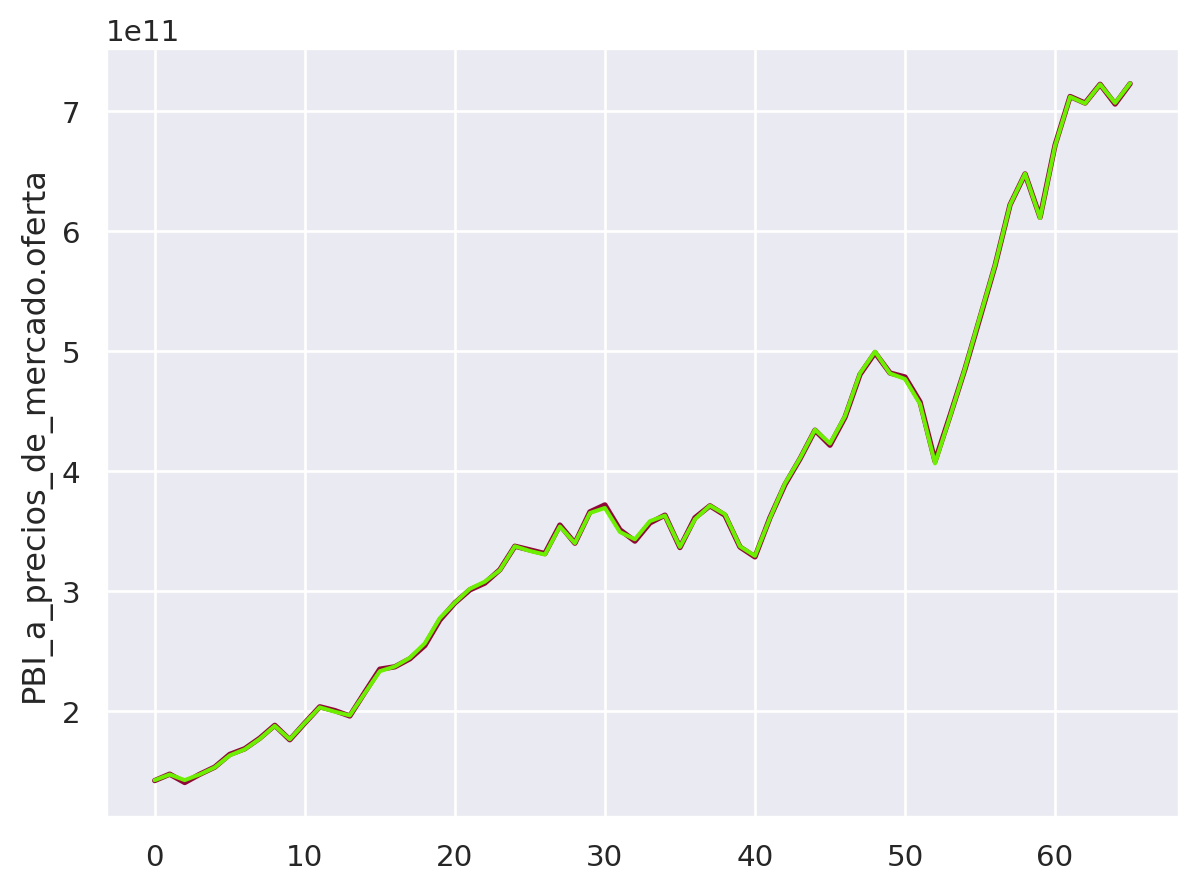

In [48]:
# b)

# datos = macro.loc[:, [col for col in macro.columns if col != 'PBI_a_precios_de_mercado.oferta']]
# # datos['PBI_a_precios_de_mercado.oferta']= macro.loc[:, 'PBI_a_precios_de_mercado.oferta']  # Forma correcta: retorna una serie
# datos['PBI_a_precios_de_mercado.oferta'] = macro['PBI_a_precios_de_mercado.oferta']  # Alternativa, retorna una serie 
# # datos['PBI_a_precios_de_mercado.oferta']= macro[['PBI_a_precios_de_mercado.oferta']] Funciona pero en realidad retorna un dataframe

# # Obtengo los nombres de la variables x que van a predecir a y
columnas_X = [col for col in macro.columns if col != 'PBI_a_precios_de_mercado.oferta']
# # Construyo la formula en notación den Wilkinson
# formula = 'PBI_a_precios_de_mercado.oferta ~ ' + ' + '.join(columnas_X)

# y, X = Formula(formula).get_model_matrix(datos)
# # # Verifico los datos
# # X.head()
# # y.head()

# Como este caso es simple, puedo obtener X,y directamente:

X = macro[columnas_X]  # Equivale a macro[['c1', 'c2', ..., 'cn']]
y = macro['PBI_a_precios_de_mercado.oferta']

modelo = linear_model.LinearRegression(fit_intercept=True)  # Inicializo el modelo de regresión lineal con intercepto porque no tiene 
modelo.fit(X, y)  # Realizo el ajuste

# Analizo la bondad del ajuste: ¿qué tan bien explica el modelo la variabilidad de los datos?
predicciones_de_y = modelo.predict(X)
r2 = r2_score(y, predicciones_de_y)
print(f'R2: {r2}')

# Calculo el error cuadrático medio y le tomo raíz
ecm = mean_squared_error(y, predicciones_de_y)
print(f'Raíz del ecm: {np.sqrt(ecm)}')
# modelo.coef_  # Para ver el vector solución

(
    so.Plot()
    .add(so.Line(color='#8f0938', linewidth=2), x=np.array(list(range(len(y)))), y=y )
    .add(so.Line(color='#6cef00'), x=np.array(list(range(len(predicciones_de_y)))), y=predicciones_de_y)
)


### Ejercicio 2

**Enunciado**: Hallar un escalamiento lineal $f(x)$ que transforme los valores en el intervalo $[2, 5]$ a valores en el intevalo $[0, 1]$.

$f(x) = ax + b \quad \leadsto \quad \begin{cases}f(2) = a2 + b = 0 \leadsto b = -2a\\ \\ f(5) = a5 + b = 1 \leadsto 5a -2a = 1  \end{cases} \quad \leadsto \quad \displaystyle a = \frac{1}{3}, \; b = \frac{-2}{3} \quad \leadsto \quad \boxed{f(x) = \frac{1}{3}x -\frac{-2}{3}}$


### Fórmula general para escalar

$[x_{min}, x_{max}] \rightarrow [y_{min}, y_{max}]$

$\boxed{\displaystyle f(x) = y_{min} + \frac{y_{max} - y_{min}}{x_max - x_{min}} \cdot (x - x_{min})}$

En este caso: $\quad\displaystyle f(x) = 0 + \frac{1-0}{5-2} \cdot (x-2) = \ldots = \frac{1}{3}x - \frac{2}{3}$


### Ejercicio 3

In [54]:
# Obtengo y preparo los datos
ruta_a_datos = Path(os.getcwd()) / 'recs' / 'CollegeBasketballPlayers2009-2021.csv'
jugadores = pd.read_csv(ruta_a_datos)
# print(jugadores.isna().sum())
# columna_27 = jugadores.iloc[:, 27] 
# print(jugadores.iloc[:, 27].unique())
# print(columna_27)


# Arreglo las columnas para que funcionen en la formula con la notación de Wilkinson
jugadores = jugadores.rename(columns={'Rec Rank': 'RecRank'})
jugadores.columns = jugadores.columns.str.replace('+', '_plus_')
jugadores.columns = jugadores.columns.str.replace('/', '_over_')
jugadores.columns = jugadores.columns.str.replace(':', '')
jugadores.columns = jugadores.columns.str.replace(' ', '_')
jugadores.columns = jugadores.columns.str.replace('(', '')
jugadores.columns = jugadores.columns.str.replace(')', '')
# print(jugadores.columns)

# Obtengo los tipos de cada columna
tipo_de_dato_en_columnas = jugadores.dtypes
columnas_numericas = [ # Me quedo solo con aquellas donde el tipo sea int o float
    col for col in jugadores.columns 
    if tipo_de_dato_en_columnas[col] in ['int64', 'float64']
]
# print(columnas_numericas)
jugadores = jugadores[columnas_numericas]

# Genero una lista con los valores problemáticos
lista_a_borrar = [e for e in jugadores.iloc[:, 27].unique() if not isinstance(e, (int, float))]
lista_a_borrar = [e for e in lista_a_borrar if not e.isdigit()]
jugadores = jugadores[~jugadores.iloc[:, 27].isin(lista_a_borrar)]  # Me quedo con las filas cuyo valor en la columna 27 no está en la lista

# jugadores.columns[27] Devuelve el nombre de la columna 27
jugadores[jugadores.columns[27]] = pd.to_numeric( # Convierto a float
    jugadores[jugadores.columns[27]],  
    errors="coerce"  # Convierte valores no-numéricos a NaN
) 
jugadores[jugadores.columns[27]] = jugadores[jugadores.columns[27]].fillna(0.0)  # Reemplazo NaN con 0.0
display(jugadores)


/tmp/ipykernel_3333/3470680935.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  jugadores = pd.read_csv(ruta_a_datos)


GP  Min_per   Ortg   usg   eFG  TS_per  ORB_per  DRB_per  AST_per  \
0      26     29.5   97.3  16.6  42.5   44.43      1.6      4.6     15.8   
1      34     60.9  108.3  14.9  52.4   54.48      3.8      6.3     13.6   
2      27     72.0   96.2  21.8  45.7   47.98      2.1      8.0     14.7   
3      30     44.5   97.7  16.0  53.6   53.69      4.1      9.4     13.7   
4      33     56.2   96.5  22.0  52.8   54.31      8.3     18.6      8.2   
...    ..      ...    ...   ...   ...     ...      ...      ...      ...   
61056   2      0.3   60.5  19.3   0.0    0.00      0.0      0.0     51.1   
61057   4      1.3   28.3   7.1   0.0    0.00      7.0      0.0      0.0   
61058   1      0.1    0.0   0.0   0.0    0.00      0.0      0.0      0.0   
61059   1      0.1    0.0   0.0   0.0    0.00      0.0      0.0      0.0   
61060   4      1.0   89.6  28.8  25.0   25.00     10.3      0.0     48.0   

       TO_per  ...     ogbpm      dgbpm    oreb    dreb    treb     ast  \
0        16.3  ... -2.781990  -1.941150  0.1923  0.6154  0.8077  1.1923   
1        19.8  ... -0.052263  -0.247934  0.6765  1.2647  1.9412  1.8235   
2        15.9  ...  1.548230  -0.883163  0.6296  2.3333  2.9630  1.9630   
3        23.8  ... -0.342775  -0.393459  0.7000  1.4333  2.1333  1.1000   
4        22.7  ... -1.684860  -0.668318  1.4242  3.3030  4.7273  0.8485   
...       ...  ...       ...        ...     ...     ...     ...     ...   
61056     0.0  ...  2.143290  16.018200  0.0000  0.0000  0.0000  0.5000   
61057    50.3  ... -7.242230  -4.993820  0.2500  0.0000  0.2500  0.0000   
61058     0.0  ... -3.524820  -1.126810  0.0000  0.0000  0.0000  0.0000   
61059     0.0  ... -1.876040  -2.380750  0.0000  0.0000  0.0000  0.0000   
61060     0.0  ...  9.220840  -3.329310  0.2500  0.0000  0.2500  0.7500   

          stl     blk      pts  Unnamed_65  
0      0.3462  0.0385   3.8846     6.22026  
1      0.4118  0.2353   5.9412     3.94375  
2      0.4815  0.0000  12.1852    10.92680  
3      0.5667  0.1333   4.9333     6.77427  
4      0.4545  0.3333   7.5758     0.00000  
...       ...     ...      ...         ...  
61056  0.5000  0.0000   0.0000     0.00000  
61057  0.0000  0.0000   0.0000     0.00000  
61058  0.0000  0.0000   0.0000     0.00000  
61059  0.0000  0.0000   0.0000     0.00000  
61060  0.0000  0.0000   0.7500    10.43920  

[61061 rows x 58 columns]

### Modelo sin escalar los datos con MinMax

In [55]:
# # Obtengo los nombres de la variables x que van a predecir a y
columnas_X = [col for col in jugadores.columns if col != 'pts']
# Construyo la formula en notación den Wilkinson
formula = 'pts ~ ' + ' + '.join(columnas_X)
# print(formula)

# Genero el modelo
y, X = Formula(formula).get_model_matrix(jugadores)

modelo = linear_model.LinearRegression(fit_intercept=False)  # Inicializo el modelo de regresión lineal sin intercepto porque ya tiene 
modelo.fit(X, y)  # Realizo el ajuste

# Analizo la bondad del ajuste: ¿qué tan bien explica el modelo la variabilidad de los datos?
predicciones_de_y = modelo.predict(X)
r2 = r2_score(y, predicciones_de_y)
print(f'R2: {r2}')

# Calculo el error cuadrático medio y le tomo raíz
ecm = mean_squared_error(y, predicciones_de_y)
print(f'Raíz del ecm: {np.sqrt(ecm)}')
# modelo.coef_  # Para ver el vector solución

# Ordeno el peso de los coeficientes de mayor a menor
pesos_coeficientes = {}
for posicion in range(modelo.coef_[0].shape[0]):
    pesos_coeficientes[modelo.coef_[0][posicion].item()] = posicion      
pesos_ordenados = { c: v for c,v in sorted(pesos_coeficientes.items(), reverse=True) }
# print(pesos_ordenados)

# Obtengo un diccionario con los nombres de las variables y el peso en el modelo
peso_variables = {}
for c,v in pesos_ordenados.items():
    peso_variables[X.columns[v]] = c
display(peso_variables)
# sns.boxplot(X)

R2: 0.9906236685609148
Raíz del ecm: 0.47392633734307515


{'dbpm': 2606.3233486855675,
 'obpm': 2606.277714407432,
 'ogbpm': 1120.8071500999258,
 'dgbpm': 1120.5726715284989,
 'treb': 105.5306127923402,
 'stl': 2.2606638658166647,
 'porpag': 0.6688405287960044,
 'midmade_over_midmade_plus_midmiss': 0.3924081806913413,
 'usg': 0.3044480574056386,
 'blk': 0.27683718436917015,
 'mp': 0.21745398190770127,
 'pfr': 0.18561793263424783,
 'TS_per': 0.09982735053678679,
 'Ortg': 0.09717147132247242,
 'year': 0.05891134029681283,
 'TPM': 0.03004010313168029,
 'rimmade': 0.030015244861189505,
 'twoPA': 0.01971172749136657,
 'midmade': 0.01941102709578424,
 'FTM': 0.011877585827573235,
 'TPA': 0.010739954963883358,
 'twoPM': 0.009629886721209319,
 'dunksmiss_plus_dunksmade': 0.006993453461341614,
 'drtg': 0.004525673634337438,
 'ftr': 0.002712484679565086,
 'FTA': 0.0007253044010220172,
 'RecRank': 0.000229298357007357,
 'pick': 0.00015318387116991516,
 'pid': 1.606405507836861e-06,
 'blk_per': -0.007874701669264291,
 'dunksmade': -0.009226297251225368,


### Modelo con los datos escalados (MinMax)

In [56]:
# Escalo los datos
escalador = MinMaxScaler().set_output(transform='pandas')  # Le indico que devuelva un DataFrame

# Calculo los coeficientes y escalo las variables
X_escalada = escalador.fit_transform(X)  
# display(X_escalada)

# Vuelvo a ajustar, usando los datos escalados
modelo_lineal = linear_model.LinearRegression()
modelo_lineal.fit(X_escalada,y)
predicciones_de_y = modelo_lineal.predict(X_escalada)

# Evalúo el modelo
rmse = np.sqrt(mean_squared_error(y, predicciones_de_y))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y, predicciones_de_y)
print(f"R cuadrado: {r2:.5f}")

# Ordeno el peso de los coeficientes de mayor a menor
pesos_coeficientes = {}
for posicion in range(modelo_lineal.coef_[0].shape[0]):
    pesos_coeficientes[modelo_lineal.coef_[0][posicion].item()] = posicion      
pesos_ordenados = { c: v for c,v in sorted(pesos_coeficientes.items(), reverse=True) }
# print(pesos_ordenados)

# Obtengo un diccionario con los nombres de las variables y el peso en el modelo
peso_variables = {}
for c,v in pesos_ordenados.items():
    peso_variables[X.columns[v]] = c
display(peso_variables)
# sns.boxplot(X)

Raíz del Error Cuadrático Medio: 0.47393
R cuadrado: 0.99062


{'obpm': 48782.92493200002,
 'dbpm': 40274.42005218314,
 'ogbpm': 22097.92344146373,
 'dgbpm': 14016.033333167701,
 'treb': 1484.5307892264655,
 'twoPA': 10.368368660641941,
 'usg': 8.098318326956809,
 'stl': 7.786630619441729,
 'mp': 7.729662731726708,
 'rimmade': 7.3237197462361046,
 'Ortg': 7.0157802294660545,
 'porpag': 5.796205464630402,
 'TPM': 4.415895160309348,
 'TPA': 4.0811828863231066,
 'TS_per': 4.049995611361958,
 'midmade': 3.746328229622568,
 'FTM': 3.0406619718163266,
 'twoPM': 2.946745336519746,
 'pfr': 1.6891231869785281,
 'blk': 1.4556375991304176,
 'dunksmiss_plus_dunksmade': 0.9161424034495966,
 'year': 0.648024743254112,
 'midmade_over_midmade_plus_midmiss': 0.27468572648928113,
 'ftr': 0.2622972684969245,
 'FTA': 0.2386251479700099,
 'drtg': 0.1837744818427769,
 'pid': 0.11833746816485946,
 'RecRank': 0.02292983569491147,
 'pick': 0.009037848402547066,
 'Intercept': -2.1249141633924654e-07,
 'dunksmade_over_dunksmade_plus_dunksmiss': -0.0654939361033513,
 'TP_per

### Modelo con escalamiento estándar

In [57]:
# Llevo la media a cero y divido por la varianza
# X_standard = (X - X.mean()) / np.sqrt(X.var())  # Puedo calcularla "a mano"
escalador_est = StandardScaler().set_output(transform='pandas')
X_escala_est = escalador_est.fit_transform(X)

# Vuelvo a ajustar, usando los datos escalados
modelo_lineal_es = linear_model.LinearRegression()
modelo_lineal_es.fit(X_escala_est,y)
predicciones_de_y = modelo_lineal_es.predict(X_escala_est)

# Evalúo el modelo
rmse = np.sqrt(mean_squared_error(y, predicciones_de_y))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y, predicciones_de_y)
print(f"R cuadrado: {r2:.5f}")

# Ordeno el peso de los coeficientes de mayor a menor
pesos_coeficientes = {}
for posicion in range(modelo_lineal_es.coef_[0].shape[0]):
    pesos_coeficientes[modelo_lineal_es.coef_[0][posicion].item()] = posicion      
pesos_ordenados = { c: v for c,v in sorted(pesos_coeficientes.items(), reverse=True) }
# print(pesos_ordenados)

# Obtengo un diccionario con los nombres de las variables y el peso en el modelo
peso_variables = {}
for c,v in pesos_ordenados.items():
    peso_variables[X.columns[v]] = c
display(peso_variables)
# sns.boxplot(X)

Raíz del Error Cuadrático Medio: 0.47393
R cuadrado: 0.99062


{'obpm': 6552.675650085835,
 'dbpm': 5833.43361892144,
 'ogbpm': 3067.7641579235,
 'dgbpm': 1781.475682458759,
 'treb': 250.2777992344681,
 'twoPA': 1.8620012579273362,
 'mp': 1.4728956773762478,
 'usg': 1.3422965423272557,
 'stl': 1.1529209530575413,
 'rimmade': 1.1204051234941375,
 'porpag': 1.0323049122512682,
 'Ortg': 0.9221022498680795,
 'TPM': 0.8656712443060274,
 'TPA': 0.7808201173811575,
 'FTM': 0.559159566822871,
 'TS_per': 0.5122440426878665,
 'twoPM': 0.5066491716233545,
 'midmade': 0.5031430860838122,
 'pfr': 0.20826379083655105,
 'blk': 0.2077189872088837,
 'year': 0.1950496442070575,
 'dunksmiss_plus_dunksmade': 0.13335849609586176,
 'FTA': 0.04374548000483225,
 'ftr': 0.04020066886844614,
 'pid': 0.03030152769949164,
 'midmade_over_midmade_plus_midmiss': 0.029483530399242175,
 'drtg': 0.027078507748626413,
 'RecRank': 0.007378010602059615,
 'pick': 0.002552681379213051,
 'Intercept': -2.1586985975327186e-08,
 'dunksmade_over_dunksmade_plus_dunksmiss': -0.008906389273451